In [199]:
# This notebook is used to analyze dataframes with ECOD domains for bacteriophage genomes from the Refseq database. 
# As input, you should have a csv file generated by the "get_ECOD_dataframe.ipynb" notebook,

In [200]:
# all the necessary imports to make the notebook work
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [201]:
# import csv file to dataframe

dane = pd.read_csv('C:/Users/maksn/Downloads/ecod_final_to_clinker_annot.csv', sep=",", header=0)

dane

,genome_id,gene_start,gene_end,domain_start,domain_end,t_name,f_id,gene_id,strand,func_annot,func_category
0,NC_031061.1,35130,36083,35142,35352,"tetra-helical, lambda repressor-like",101.1.4.64,NC_031061.1:35130-36083(-),-1,NaN,NaN
1,NC_031061.1,35130,36083,35148,35373,"tetra-helical, lambda repressor-like",101.1.4.64,NC_031061.1:35130-36083(-),-1,NaN,NaN
2,NC_031061.1,35130,36083,35157,35490,"tetra-helical, lambda repressor-like",101.1.4.66,NC_031061.1:35130-36083(-),-1,NaN,NaN
3,NC_031061.1,35130,36083,35154,35373,"tetra-helical, lambda repressor-like",101.1.4.64,NC_031061.1:35130-36083(-),-1,NaN,NaN
4,NC_031061.1,35130,36083,35136,35355,"tetra-helical, lambda repressor-like",101.1.4.27,NC_031061.1:35130-36083(-),-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1839656,NC_048165.1,43653,44456,43971,44436,winged,101.1.2.3,NC_048165.1:43653-44456(+),1,NaN,NaN
1839657,NC_047988.1,42947,43750,43265,43730,winged,101.1.2.3,NC_047988.1:42947-43750(+),1,NaN,NaN
1839658,NC_047976.1,41712,42551,42030,42495,winged,101.1.2.3,NC_047976.1:41712-42551(+),1,NaN,NaN
1839659,NC_048020.1,41613,42452,41931,42396,winged,101.1.2.3,NC_048020.1:41613-42452(+),1,NaN,NaN


In [202]:
# copying to another variable

maniak = dane
maniak

,genome_id,gene_start,gene_end,domain_start,domain_end,t_name,f_id,gene_id,strand,func_annot,func_category
0,NC_031061.1,35130,36083,35142,35352,"tetra-helical, lambda repressor-like",101.1.4.64,NC_031061.1:35130-36083(-),-1,NaN,NaN
1,NC_031061.1,35130,36083,35148,35373,"tetra-helical, lambda repressor-like",101.1.4.64,NC_031061.1:35130-36083(-),-1,NaN,NaN
2,NC_031061.1,35130,36083,35157,35490,"tetra-helical, lambda repressor-like",101.1.4.66,NC_031061.1:35130-36083(-),-1,NaN,NaN
3,NC_031061.1,35130,36083,35154,35373,"tetra-helical, lambda repressor-like",101.1.4.64,NC_031061.1:35130-36083(-),-1,NaN,NaN
4,NC_031061.1,35130,36083,35136,35355,"tetra-helical, lambda repressor-like",101.1.4.27,NC_031061.1:35130-36083(-),-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1839656,NC_048165.1,43653,44456,43971,44436,winged,101.1.2.3,NC_048165.1:43653-44456(+),1,NaN,NaN
1839657,NC_047988.1,42947,43750,43265,43730,winged,101.1.2.3,NC_047988.1:42947-43750(+),1,NaN,NaN
1839658,NC_047976.1,41712,42551,42030,42495,winged,101.1.2.3,NC_047976.1:41712-42551(+),1,NaN,NaN
1839659,NC_048020.1,41613,42452,41931,42396,winged,101.1.2.3,NC_048020.1:41613-42452(+),1,NaN,NaN


In [203]:
# This function overlap_90 computes whether two genomic regions (row1 and row2) overlap by at least 90% of the length of the smaller region. 
# It calculates the overlap length between the two regions and compares it against 90% of the minimum length between the two regions (min(len1, len2)). 
# The function returns True if the overlap meets this criterion, otherwise False.

def overlap_90(row1, row2):
    start1, end1 = row1['domain_start'], row1['domain_end']
    start2, end2 = row2['domain_start'], row2['domain_end']
    overlap = max(0, min(end1, end2) - max(start1, start2))
    len1 = end1 - start1
    len2 = end2 - start2
    return overlap >= 0.9 * min(len1, len2)

In [204]:
# The remove_overlapping_domains function processes a DataFrame df_genome containing genomic domain data. 
# It sorts the DataFrame by the starting positions of the domains (domain_start). Then, it iterates through each pair of domains to check if they 
# overlap significantly (at least 90% overlap of the shorter domain). If such overlaps are found between domains belonging to the same t_name, the index 
# of the overlapping domain (j) is added to a set to_remove. After checking all pairs, it removes rows from the DataFrame where indices are present in
#  the to_remove set, effectively removing overlapping genomic domains while preserving the non-overlapping ones.

def remove_overlapping_domains(df_genome):
    df_genome = df_genome.sort_values(by=['domain_start'])
    to_remove = set()
    for i in range(len(df_genome)):
        if i in to_remove:
            continue
        for j in range(i + 1, len(df_genome)):
            if df_genome.iloc[i]['t_name'] == df_genome.iloc[j]['t_name'] and overlap_90(df_genome.iloc[i], df_genome.iloc[j]):
                to_remove.add(j)
    return df_genome.drop(df_genome.index[list(to_remove)])

In [205]:
# This code segment processes a DataFrame maniak containing genomic domain data split across different genomes identified by unique genome_id. 
# It iterates through each unique genome_id, filters out overlapping domains within each genome using the remove_overlapping_domains function, and collects the filtered 
# DataFrames into filtered_dfs_maniak.

unique_genomes = maniak['genome_id'].unique()
filtered_dfs_maniak = []

for genome in unique_genomes:
    df_genome_maniak = maniak[maniak['genome_id'] == genome]
    filtered_df_genome_maniak = remove_overlapping_domains(df_genome_maniak)
    filtered_dfs_maniak.append(filtered_df_genome_maniak)
    print(f"Removed overlapped domains from Genome {genome}")

maniak_gotowe = pd.concat(filtered_dfs_maniak)

Removed overlapped domains from Genome NC_031061.1
Removed overlapped domains from Genome NC_028955.1
Removed overlapped domains from Genome NC_029002.1
Removed overlapped domains from Genome NC_008562.1
Removed overlapped domains from Genome NC_001884.1
Removed overlapped domains from Genome NC_019401.1
Removed overlapped domains from Genome NC_041917.1
Removed overlapped domains from Genome NC_041878.1
Removed overlapped domains from Genome NC_042116.1
Removed overlapped domains from Genome NC_041858.1
Removed overlapped domains from Genome NC_020479.1
Removed overlapped domains from Genome NC_020477.1
Removed overlapped domains from Genome NC_022765.1
Removed overlapped domains from Genome NC_020480.1
Removed overlapped domains from Genome NC_020478.1
Removed overlapped domains from Genome NC_022766.1
Removed overlapped domains from Genome NC_022773.1
Removed overlapped domains from Genome NC_025429.1
Removed overlapped domains from Genome NC_010275.2
Removed overlapped domains from

In [207]:
# Sorting the dataframe

maniak_sorted = maniak_gotowe.sort_values(by='genome_id', ascending=True)
maniak_sorted

,genome_id,gene_start,gene_end,domain_start,domain_end,t_name,f_id,gene_id,strand,func_annot,func_category
1591967,NC_000866.4,162967,163602,162970,163240,winged,101.1.2.89,NC_000866.4:162967-163602(-),-1,MotA-like activator of middle period transcrip...,transcription regulation
742226,NC_000866.4,3778,5328,3781,4462,ATPase domain of HSP90 chaperone/DNA topoisome...,225.1.1.20,NC_000866.4:3778-5328(-),-1,Type II TA system,antidefense
742486,NC_000866.4,3778,5328,3910,4591,ATPase domain of HSP90 chaperone/DNA topoisome...,225.1.1.20,NC_000866.4:3778-5328(-),-1,Type II TA system,antidefense
742446,NC_000866.4,3778,5328,4465,5590,Ribosomal protein S5 domain 2-like,212.1.1.3,NC_000866.4:3778-5328(-),-1,Type II TA system,antidefense
881579,NC_000866.4,5702,5839,5702,5813,Rubredoxin-related,375.1.1.56,NC_000866.4:5702-5839(-),-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1453795,NC_056724.1,25911,27035,26769,27771,DNA breaking-rejoining enzymes,101.1.8.20,NC_056724.1:25911-27035(-),-1,NaN,NaN
261531,NC_056724.1,28005,28898,28005,28209,"tetra-helical, lambda repressor-like",101.1.4.64,NC_056724.1:28005-28898(-),-1,transcriptional repressor,transcription regulation
261947,NC_056724.1,28005,28898,28017,28149,tri-helical,101.1.1.56,NC_056724.1:28005-28898(-),-1,transcriptional repressor,transcription regulation
689145,NC_056724.1,8821,9312,8821,8899,Chromatin protein Cren7,4.26.1.1,NC_056724.1:8821-9312(+),1,NaN,NaN


In [208]:
# function to extract topology of domains

def extract_t_id(f_id):
    return '.'.join(f_id.split('.')[:3])

In [209]:
# extracting identificator of topology of domains

maniak_sorted['t_id'] = maniak_sorted['f_id'].apply(extract_t_id)

In [211]:
# Group data by genome_id and sort by gene_start, then combine t_id into a sequence
maniak_sorted['domain_seq'] = maniak_sorted.sort_values(by=['genome_id', 'gene_start']).groupby('genome_id')['t_id'].transform(lambda x: '|'.join(x))

# Remove duplicates, leaving unique combinations of genome_id and domain_seq
df_unique = maniak_sorted[['genome_id', 'domain_seq']].drop_duplicates().reset_index(drop=True)

# Assign a unique identifier for each unique domain_seq sequence
df_unique['domain_seq_id'] = df_unique.groupby('domain_seq').ngroup() + 1


In [213]:
# merges two DataFrames based on the genome_id column using an inner join, and then selects specific columns from the merged DataFrame to create a refined DataFrame
maniak_final = pd.merge(maniak_sorted, df_unique, how="inner", on= "genome_id")
maniak_final = maniak_final[["genome_id", "gene_start", "gene_end", "domain_start", "domain_end", "t_name", "t_id", "f_id", "func_annot", "func_category", "strand", "domain_seq_id"]]

In [269]:
# saving dataframe to csv file, checkpoint
maniak_final.to_csv('po_usunieciu_overlap.csv', index=False)

In [302]:
maniak_final = pd.read_csv("C:/Users/maksn/Downloads/po_usunieciu_overlap.csv")

In [216]:
# loading the result table with WGRR values - the table is the result of the MANIAC program - version 1 of wgrr table used
df_maniak_wgrr = pd.read_csv("C:/Users/maksn/Downloads/genome-alignment.csv")

In [218]:
# loading the result table with WGRR values - the table is the result of the MANIAC program - version 2 of wgrr table used
df_maniac_annot = pd.read_csv('aai_table.csv')

In [220]:
# Dropping null values and selecting specific columns
df_maniac_annot = df_maniac_annot.dropna()
df_maniac_annot = df_maniac_annot[['Seq1', 'Seq2', 'wgrr_aai']]

In [224]:
# filtering of the wgrr table at a cutoff value equal to 0.5
df_maniak_50 = df_maniac_annot.loc[df_maniac_annot['wgrr_aai'] > 0.5]

In [225]:
# filtering of the wgrr table at a cutoff value equal to 0.7
df_maniak_70 = df_maniac_annot.loc[df_maniac_annot['wgrr_aai'] > 0.7]

In [226]:
# filtering of the wgrr table at a cutoff value equal to 0.8
df_maniak_80 = df_maniac_annot.loc[df_maniac_annot['wgrr_aai'] > 0.8]

In [227]:
# filtering of the wgrr table at a cutoff value equal to 0.95
df_maniak_95 = df_maniac_annot.loc[df_maniac_annot['wgrr_aai'] > 0.95]

In [228]:
# saving new dataframe with cutoff of 0.5
df_maniak_50.to_csv('maniac_klastry_50_wgrr_nowe.csv', index=False)

In [229]:
# saving new dataframe with cutoff of 0.7
df_maniak_70.to_csv('maniac_klastry_70_wgrr_nowe.csv', index=False)

In [230]:
# saving new dataframe with cutoff of 0.8
df_maniak_80.to_csv('maniac_klastry_80_wgrr_nowe.csv', index=False)

In [231]:
# saving new dataframe with cutoff of 0.95
df_maniak_95.to_csv('maniac_klastry_95_wgrr_nowe.csv', index=False)

In [236]:
# loading a table with genomes and their wgrr values after MCL-type clustering at a cut-off level equal to 0.95
wyniki_klastry_95 = pd.read_csv("C:/Users/maksn/Downloads/maniac_whole_clusters_wgrr_95.csv", sep=',')

In [237]:
# Data cleaning and adding new column about size of each clusters, "__mclCluster" is unique identifier of such cluster
wyniki_klastry_95 = wyniki_klastry_95[["__mclCluster", "name"]]
wyniki_klastry_95 = wyniki_klastry_95.assign(wgrr_cutoff=0.95)
wyniki_klastry_95['cluster_size'] = wyniki_klastry_95.groupby('__mclCluster')['__mclCluster'].transform('count')

,__mclCluster,name,wgrr_cutoff,cluster_size
0,156,NC_001421,0.95,2
1,156,NC_007451,0.95,2
2,155,NC_001998,0.95,2
3,155,NC_002180,0.95,2
4,154,NC_002796,0.95,2
...,...,...,...,...
342,26,NC_054946,0.95,2
343,25,NC_055719,0.95,2
344,25,NC_055744,0.95,2
345,24,NC_055853,0.95,2


In [238]:
# filtering clusters of size smaller than 4 genomes
wyniki_klastry_95 = wyniki_klastry_95[wyniki_klastry_95['cluster_size'] >= 4]

In [239]:
# loading a table with genomes and their wgrr values after MCL-type clustering at a cut-off level equal to 0.8
wyniki_klastry_80 = pd.read_csv("C:/Users/maksn/Downloads/maniac_whole_clusters_wgrr_80.csv", sep=',')

In [240]:
# Data cleaning and adding new column about size of each clusters, "__mclCluster" is unique identifier of such cluster
wyniki_klastry_80 = wyniki_klastry_80[["__mclCluster", "name"]]
wyniki_klastry_80 = wyniki_klastry_80.assign(wgrr_cutoff=0.8)
wyniki_klastry_80['cluster_size'] = wyniki_klastry_80.groupby('__mclCluster')['__mclCluster'].transform('count')


,__mclCluster,name,wgrr_cutoff,cluster_size
0,534,NC_000867,0.8,2
1,534,NC_042121,0.8,2
2,62,NC_000902,0.8,7
3,62,NC_000924,0.8,7
4,62,NC_004913,0.8,7
...,...,...,...,...
2227,156,NC_061441,0.8,3
2228,156,NC_061443,0.8,3
2229,256,NC_062751,0.8,2
2230,256,NC_062752,0.8,2


In [241]:
# filtering clusters of size smaller than 4 genomes
wyniki_klastry_80 = wyniki_klastry_80[wyniki_klastry_80['cluster_size'] >= 4]

In [242]:
# loading a table with genomes and their wgrr values after MCL-type clustering at a cut-off level equal to 0.7
wyniki_klastry_70 = pd.read_csv("C:/Users/maksn/Downloads/maniac_whole_clusters_wgrr_70.csv", sep=',')

In [243]:
# Data cleaning and adding new column about size of each clusters, "__mclCluster" is unique identifier of such cluster
wyniki_klastry_70 = wyniki_klastry_70[["__mclCluster", "name"]]
wyniki_klastry_70 = wyniki_klastry_70.assign(wgrr_cutoff=0.7)
wyniki_klastry_70['cluster_size'] = wyniki_klastry_70.groupby('__mclCluster')['__mclCluster'].transform('count')

,__mclCluster,name,wgrr_cutoff,cluster_size
0,NaN,NC_000866,0.7,NaN
1,1.0,NC_008515,0.7,82.0
2,1.0,NC_012635,0.7,82.0
3,1.0,NC_012638,0.7,82.0
4,1.0,NC_015457,0.7,82.0
...,...,...,...,...
2954,NaN,NC_061448,0.7,NaN
2955,NaN,NC_062745,0.7,NaN
2956,NaN,NC_062746,0.7,NaN
2957,256.0,NC_062751,0.7,2.0


In [244]:
# filtering clusters of size smaller than 4 genomes
wyniki_klastry_70 = wyniki_klastry_70[wyniki_klastry_70['cluster_size'] >= 4]

In [245]:
# loading a table with genomes and their wgrr values after MCL-type clustering at a cut-off level equal to 0.5
wyniki_klastry_50 = pd.read_csv("C:/Users/maksn/Downloads/maniac_whole_clusters_wgrr_50.csv", sep=',')

In [246]:
# Data cleaning and adding new column about size of each clusters, "__mclCluster" is unique identifier of such cluster
wyniki_klastry_50 = wyniki_klastry_50[["__mclCluster", "name"]]
wyniki_klastry_50 = wyniki_klastry_50.assign(wgrr_cutoff=0.5)
wyniki_klastry_50['cluster_size'] = wyniki_klastry_50.groupby('__mclCluster')['__mclCluster'].transform('count')

,__mclCluster,name,wgrr_cutoff,cluster_size
0,NaN,NC_000866,0.5,NaN
1,1.0,NC_008515,0.5,82.0
2,1.0,NC_012635,0.5,82.0
3,1.0,NC_012638,0.5,82.0
4,1.0,NC_015457,0.5,82.0
...,...,...,...,...
3654,NaN,NC_061421,0.5,NaN
3655,NaN,NC_062745,0.5,NaN
3656,NaN,NC_062746,0.5,NaN
3657,256.0,NC_062751,0.5,2.0


In [247]:
# filtering clusters of size smaller than 4 genomes
wyniki_klastry_50 = wyniki_klastry_50[wyniki_klastry_50['cluster_size'] >= 4]

In [248]:
import os

# downloading current catalog
curr_cat = os.getcwd()
# printing it
print(f"Current catalog: {curr_cat}")

Bieżący katalog: c:\Users\maksn\Downloads


In [305]:
# Crating new column based on genome identifier up to first dot
maniak_final['genome_short'] = maniak_final['genome_id'].str.split('.').str[0]

In [250]:
# Renaming columns
wyniki_klastry_80 = wyniki_klastry_80.rename(columns={"name":"genome_id"})
wyniki_klastry_50 = wyniki_klastry_50.rename(columns={"name":"genome_id"})
wyniki_klastry_70 = wyniki_klastry_70.rename(columns={"name":"genome_id"})
wyniki_klastry_95 = wyniki_klastry_95.rename(columns={"name":"genome_id"})

In [255]:
# concatenation of every cutoff wgrr dataframe and once again changing name
wyniki_kl = pd.concat([wyniki_klastry_50, wyniki_klastry_70, wyniki_klastry_80, wyniki_klastry_95])
wyniki_kl = wyniki_kl.rename(columns={"genome_id":"genome_short"})

In [306]:
# Merging informations about domains and genomes with information about clusters and wgrr values
maniak_finali = pd.merge(maniak_final, wyniki_kl, how="inner", on= "genome_short")
# a subset of columns from the table in question
maniak_finali_osobno = maniak_finali[["genome_id", "gene_start", "gene_end", "domain_start", "domain_end", "t_name", "t_id", "f_id", "strand", "domain_seq_id"]]

In [307]:
# since we have already performed the merge operation on the shortened column, we do not need to store it in the data set now
maniak_finali = maniak_finali.drop(columns=['genome_short'])

In [308]:
# converting cluster identificator and size of clusters to integer (numerical) type
maniak_finali['__mclCluster'] = maniak_finali['__mclCluster'].astype(int)
maniak_finali['cluster_size'] = maniak_finali['cluster_size'].astype(int)

In [180]:
def extract_first_numbers(domain_seq):
    return '|'.join([seq.split('.')[0] for seq in domain_seq.split('|')])

# Zastosowanie funkcji do kolumny 'domain_seq'
df_unique['domain_seq_group'] = df_unique['domain_seq'].apply(extract_first_numbers)

In [173]:
# for further calculations and data analyses we will only use domains found in genomes with a wgrr value of no less than 0.8
filtrowany_maniak_gotowy = maniak_finali[maniak_finali['wgrr_cutoff'] == 0.8]

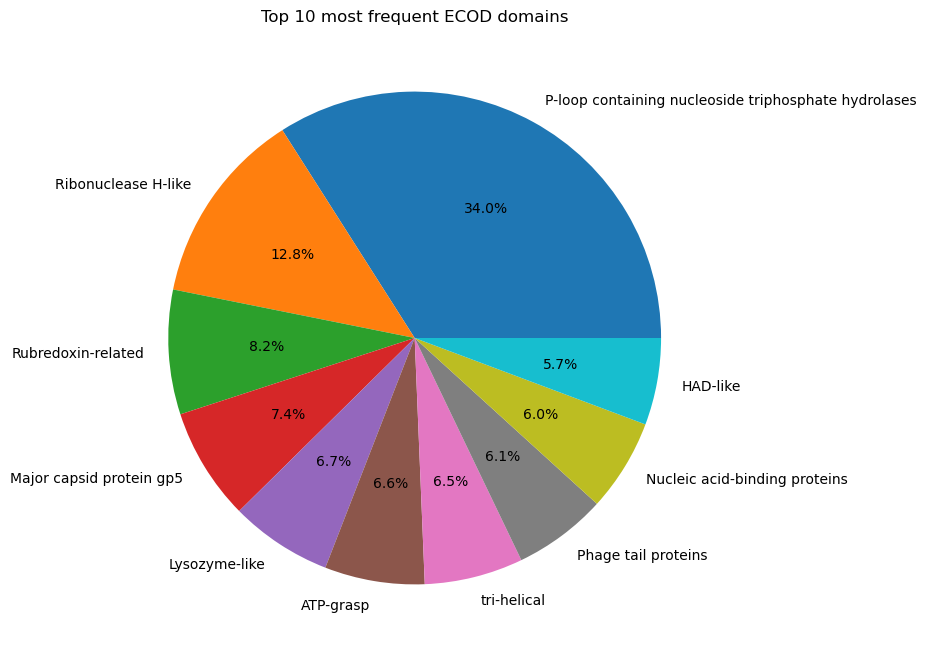

In [22]:
top_domains = filtrowany_maniak_gotowy['t_name'].value_counts().head(10)
top_domains.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 10 most frequent ECOD domains')
plt.ylabel('')
plt.show()

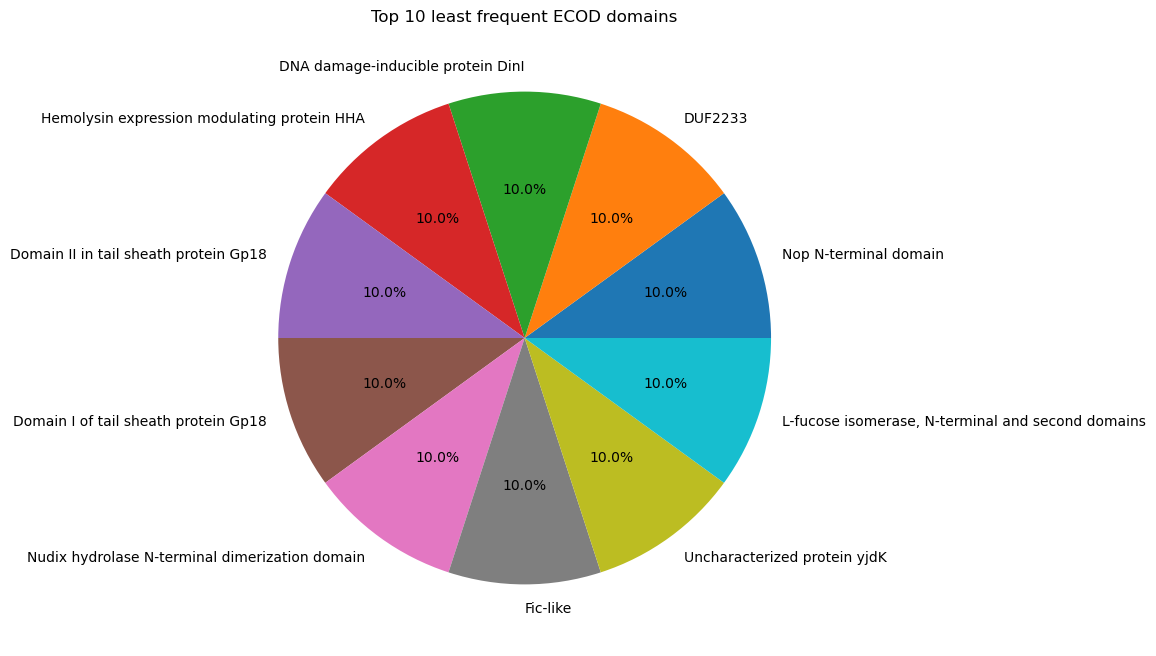

In [23]:
rare_domains = filtrowany_maniak_gotowy['t_name'].value_counts().tail(10)
rare_domains.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Top 10 least frequent ECOD domains')
plt.ylabel('')
plt.show()

In [64]:
maniak_finali['wgrr_cutoff_str'] = maniak_finali['wgrr_cutoff'].astype(str)

In [238]:
# adding new column that is string type of wgrr cutoff value
filtrowany_maniak_gotowy['wgrr_cutoff_str'] = filtrowany_maniak_gotowy['wgrr_cutoff'].astype(str)

C:\Users\maksn\AppData\Local\Temp\ipykernel_6716\2388010402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrowany_maniak_gotowy['wgrr_cutoff_str'] = filtrowany_maniak_gotowy['wgrr_cutoff'].astype(str)


In [309]:
maniak_finali['domain_length'] = maniak_finali['domain_end'] - maniak_finali['domain_start']

In [175]:
# Calculating length in nucleotides of domains
filtrowany_maniak_gotowy['domain_length'] = filtrowany_maniak_gotowy['domain_end'] - filtrowany_maniak_gotowy['domain_start']

C:\Users\maksn\AppData\Local\Temp\ipykernel_20532\3118634506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrowany_maniak_gotowy['domain_length'] = filtrowany_maniak_gotowy['domain_end'] - filtrowany_maniak_gotowy['domain_start']


In [ ]:
# First visualization from master thesis project, analysing distribution of domain lengths, does length of domain correlate with other domain informations?

c:\Users\maksn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


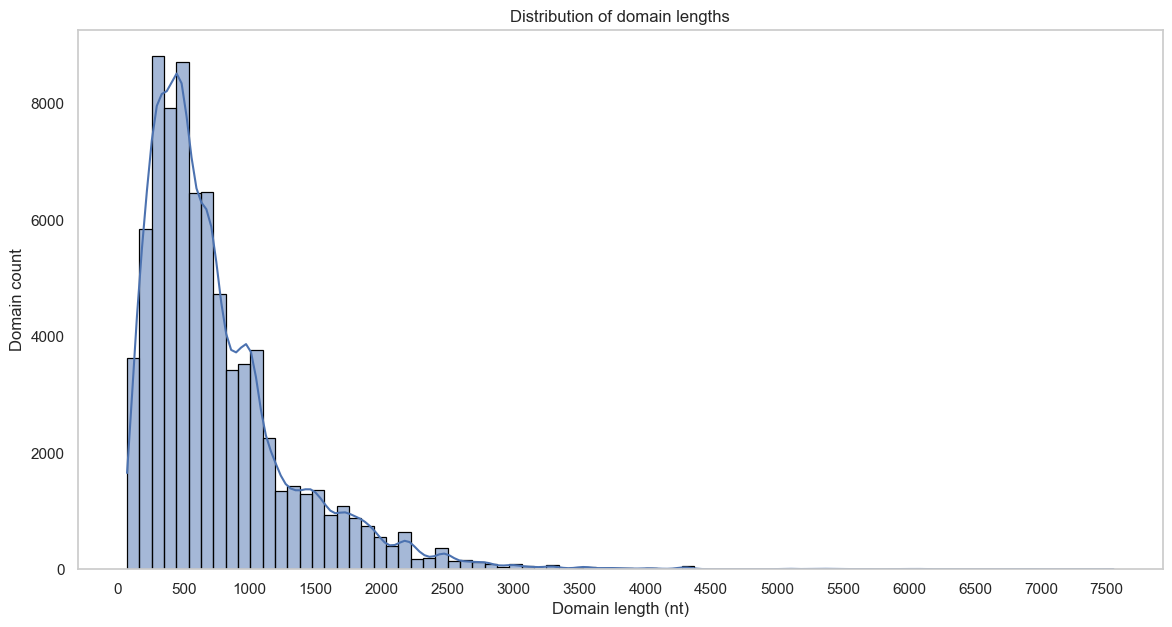

In [420]:
plt.figure(figsize=(14, 7))
sns.histplot(filtrowany_maniak_gotowy['domain_length'], bins=80, kde=True, edgecolor='black')
plt.title('Distribution of domain lengths')
plt.xlabel('Domain length (nt)')
plt.ylabel('Domain count')
plt.xticks(ticks=range(0, filtrowany_maniak_gotowy['domain_length'].max(), 500))
plt.grid(False)
plt.show()

In [421]:
# Calculating percent of domains that are shorter than 1000 nucleotides
count_less_than_1000 = filtrowany_maniak_gotowy[filtrowany_maniak_gotowy['domain_length'] < 1000].shape[0]
total_rows = filtrowany_maniak_gotowy.shape[0]
percentage_less_than_1000 = (count_less_than_1000 / total_rows) * 100
print(f"Procent wierszy z domain_length < 1000: {percentage_less_than_1000:.2f}%")

Procent wierszy z domain_length < 1000: 76.25%


In [422]:
# Calculating average domain length
average_domain_length = filtrowany_maniak_gotowy['domain_length'].mean()
print(f"Średnia długość domen: {average_domain_length:.2f}")

Średnia długość domen: 748.06


In [423]:
# Calculating maximum domain length
max_domain_length = filtrowany_maniak_gotowy['domain_length'].max()
print(f"Maksymalna długość domen: {max_domain_length:.2f}")

Maksymalna długość domen: 7551.00


In [ ]:
# Calculating minimum domain length
min_domain_length = filtrowany_maniak_gotowy['domain_length'].max()
print(f"Maksymalna długość domen: {max_domain_length:.2f}")

In [424]:
# analyzing statistics of domain length
stats = filtrowany_maniak_gotowy['domain_length'].describe()
stats

count    77958.000000
mean       748.059648
std        560.239633
min         69.000000
25%        366.000000
50%        591.000000
75%        966.000000
max       7551.000000
Name: domain_length, dtype: float64

In [437]:
# same code as above only formulated in a different way

median_length = filtrowany_maniak_gotowy['domain_length'].median()


count_less_than_1000 = filtrowany_maniak_gotowy[filtrowany_maniak_gotowy['domain_length'] < 1000].shape[0]
total_rows = filtrowany_maniak_gotowy.shape[0]
percentage_less_than_1000 = (count_less_than_1000 / total_rows) * 100

stats_int = stats.apply(lambda x: int(x))
median_int = int(median_length)
percentage_int = round(percentage_less_than_1000, 2)
percentage_formatted = f"{percentage_int}%"


statistics_table = pd.DataFrame({
    'Statistic': ['Count','Minimum', 'Maximum', 'Mean', 'Median', 'Percentage < 1000'],
    'Value': [stats_int['count'], stats_int['min'], stats_int['max'], stats_int['mean'], median_int, percentage_formatted]
})

print("Statistics for domain_length:")
print(statistics_table)

Statistics for domain_length:
           Statistic   Value
0              Count   77958
1            Minimum      69
2            Maximum    7551
3               Mean     748
4             Median     591
5  Percentage < 1000  76.25%


In [179]:
# saving ready dastaset for Clinker usage
filtrowany_maniak_gotowy.to_csv('clinker_maniak_annot_ready.csv', index=False)

In [310]:
# Calculating gene length in nucleotides
maniak_finali['gene_length'] = maniak_finali['gene_end'] - maniak_finali['gene_start']

In [176]:
# Calculating gene length in nucleotides
filtrowany_maniak_gotowy['gene_length'] = filtrowany_maniak_gotowy['gene_end'] - filtrowany_maniak_gotowy['gene_start']

C:\Users\maksn\AppData\Local\Temp\ipykernel_20532\1820367768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrowany_maniak_gotowy['gene_length'] = filtrowany_maniak_gotowy['gene_end'] - filtrowany_maniak_gotowy['gene_start']


In [83]:
# removing not used columns by selecting important ones
filtrowany_maniak_gotowy = filtrowany_maniak_gotowy[["genome_id", "gene_start", "gene_end", "domain_start", "domain_end", "domain_length", "t_name", "t_id", "f_id", "strand", "domain_seq_id", "__mclCluster", "wgrr_cutoff", "cluster_size"]]

In [91]:
filtrowany_maniak_gotowy['domain_category'] = pd.cut(filtrowany_maniak_gotowy['domain_length'], 
                                bins=[-float('inf'), 400, 1000, float('inf')], 
                                labels=['short', 'medium', 'large'], 
                                right=False)

C:\Users\maksn\AppData\Local\Temp\ipykernel_6716\2592911936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrowany_maniak_gotowy['domain_category'] = pd.cut(filtrowany_maniak_gotowy['domain_length'],


c:\Users\maksn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\maksn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\maksn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


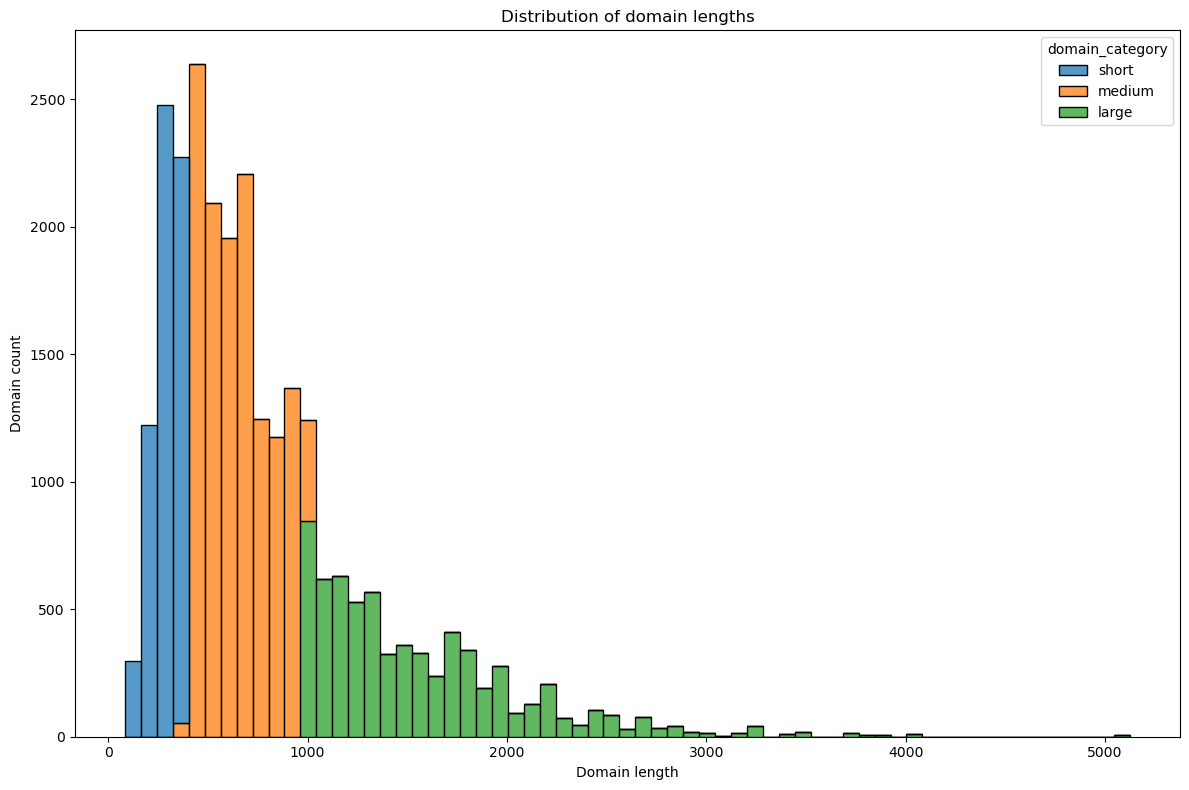

In [146]:
# Tworzenie wykresu histogramu z podziałem na kategorie 'domain_category'
plt.figure(figsize=(12, 8))
sns.histplot(data=filtrowany_maniak_gotowy, x='domain_length', hue='domain_category', multiple='stack', edgecolor='black', binwidth=80)
plt.title('Distribution of domain lengths')
plt.xlabel('Domain length')
plt.ylabel('Domain count')
plt.tight_layout()
plt.show()

c:\Users\maksn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\maksn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\maksn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


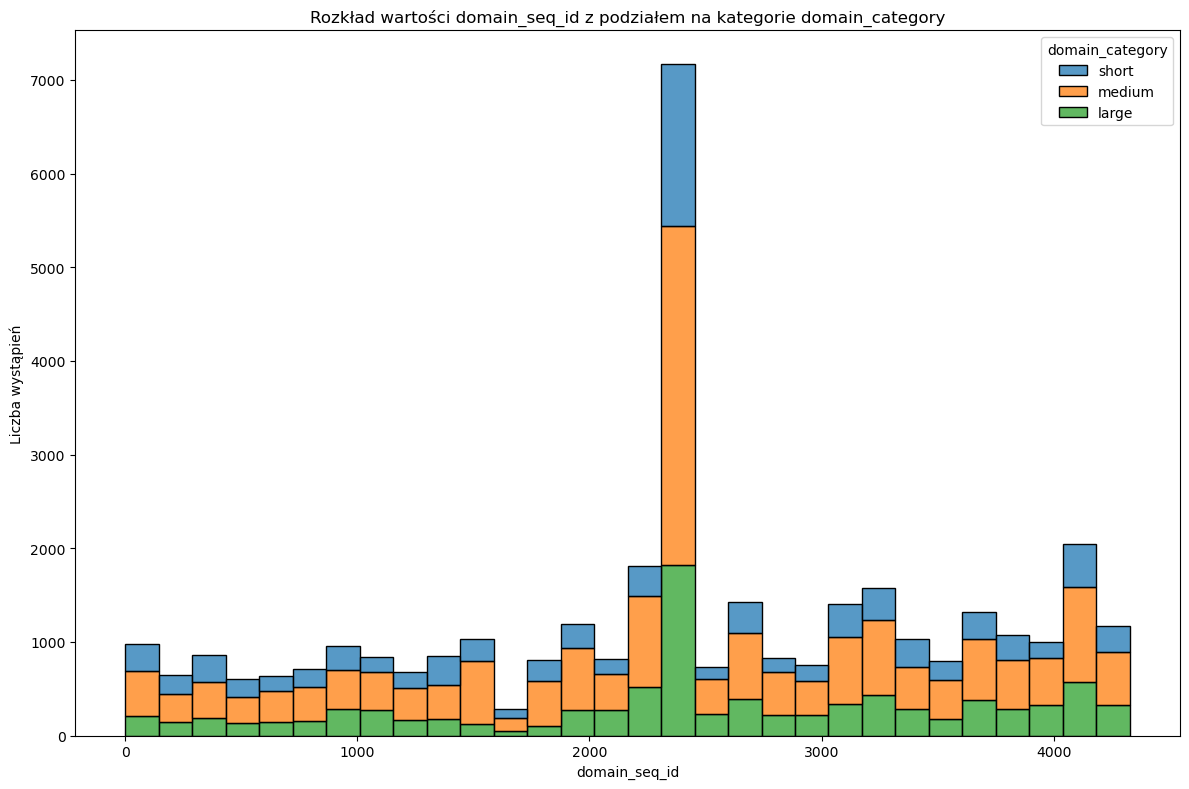

In [96]:
plt.figure(figsize=(12, 8))
sns.histplot(data=filtrowany_maniak_gotowy, x='domain_seq_id', hue='domain_category', multiple='stack', bins=30)
plt.title('Rozkład wartości domain_seq_id z podziałem na kategorie domain_category')
plt.xlabel('domain_seq_id')
plt.ylabel('Liczba wystąpień')
plt.tight_layout()
plt.show()

In [101]:
import numpy as np
counts, bin_edges = np.histogram(filtrowany_maniak_gotowy['domain_seq_id'], bins=100)

# Znalezienie największego i najmniejszego słupka
max_count_index = np.argmax(counts)
min_count_index = np.argmin(counts)

# Zakresy domain_seq_id dla największego słupka
max_range = (bin_edges[max_count_index], bin_edges[max_count_index + 1])

# Zakresy domain_seq_id dla najmniejszego słupka
min_range = (bin_edges[min_count_index], bin_edges[min_count_index + 1])

print(f"Największy słupek: liczba wystąpień = {counts[max_count_index]}, zakres domain_seq_id = {max_range}")
print(f"Najmniejszy słupek: liczba wystąpień = {counts[min_count_index]}, zakres domain_seq_id = {min_range}")


Największy słupek: liczba wystąpień = 2340, zakres domain_seq_id = (2337.5800000000004, 2380.8500000000004)
Najmniejszy słupek: liczba wystąpień = 41, zakres domain_seq_id = (1126.02, 1169.2900000000002)


c:\Users\maksn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\maksn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\maksn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


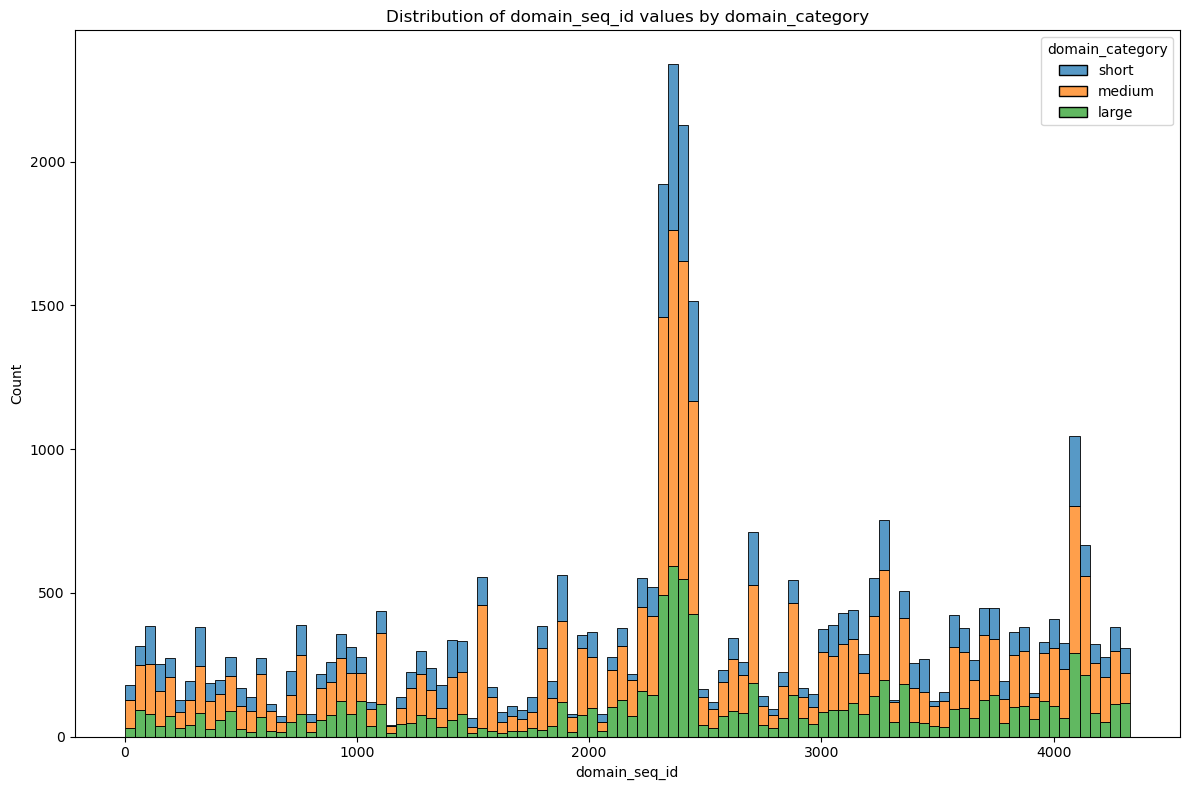

In [106]:
plt.figure(figsize=(12, 8))
sns.histplot(data=filtrowany_maniak_gotowy, x='domain_seq_id', hue='domain_category', multiple='stack', bins=100)
plt.title('Distribution of domain_seq_id values by domain_category')
plt.xlabel('domain_seq_id')
plt.ylabel('Count')
#plt.axvline(x=min_range[0], color='green', linestyle='--', label=f'Najmniejszy słupek start: {min_range[0]:.2f}')
#plt.axvline(x=min_range[1], color='green', linestyle='--', label=f'Najmniejszy słupek end: {min_range[1]:.2f}')
plt.tight_layout()
plt.show()

In [111]:
domain_seq_counts = filtrowany_maniak_gotowy['domain_seq_id'].value_counts().reset_index()
domain_seq_counts.columns = ['domain_seq_id', 'counts']

# Wyodrębnianie 10 najrzadszych wartości 'domain_seq_id' i sortowanie ich
rarest_10 = domain_seq_counts.nsmallest(10, 'counts').sort_values('counts')

rarest_10

,domain_seq_id,counts
975,3512,2
976,3505,2
977,3506,2
974,3514,3
971,761,4
972,73,4
973,3515,4
970,755,5
967,1210,6
968,3510,6


In [120]:
domain_seq_ids = filtered_df['domain_seq_id'].tolist()

# Finding the relevant cluster identifiers from the original dataframe
filtered_clusters = filtrowany_maniak_gotowy[filtrowany_maniak_gotowy['domain_seq_id'].isin(domain_seq_ids)][['domain_seq_id', '__mclCluster']]

In [4]:
filtrowany_maniak_gotowy.to_csv('ready_data_final_ver2.csv', index=False)

NameError: name 'filtrowany_maniak_gotowy' is not defined

In [164]:
genome_ids = set(filtrowany_maniak_gotowy['genome_id'])

# Filtrowanie pierwszego DataFrame na podstawie wartości `genome_id` z drugiego DataFrame
sequence_domains = df_unique[df_unique['genome_id'].isin(genome_ids)]

In [166]:
sequence_domains['Domain_Count'] = sequence_domains['domain_seq'].apply(lambda x: len(x.split('|')))

C:\Users\maksn\AppData\Local\Temp\ipykernel_6716\1595584697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sequence_domains['Domain_Count'] = sequence_domains['domain_seq'].apply(lambda x: len(x.split('|')))


In [134]:
# reading from before saved dataframe
filtrowany_maniak_gotowy = pd.read_csv('C:/Users/maksn/Downloads/clinker_maniak_annot_ready.csv', sep=",", header=0)

In [135]:
# Group data by genome_id and sort by gene_start, then combine t_id into a sequence
filtrowany_maniak_gotowy['domain_seq'] = filtrowany_maniak_gotowy.sort_values(by=['genome_id', 'gene_start']).groupby('genome_id')['t_id'].transform(lambda x: '|'.join(x))

# Removal of duplicates, leaving unique combinations of genome_id and domain_seq
df_unique = filtrowany_maniak_gotowy[['genome_id', 'domain_seq']].drop_duplicates().reset_index(drop=True)

# Assign a unique identifier for each unique domain_seq sequence
df_unique['domain_seq_id'] = df_unique.groupby('domain_seq').ngroup() + 1

In [311]:
# sorting values
maniak_finali = maniak_finali.sort_values('__mclCluster')

,genome_id,gene_start,gene_end,domain_start,domain_end,t_name,t_id,f_id,func_annot,func_category,strand,domain_seq_id,__mclCluster,wgrr_cutoff,cluster_size,domain_length,gene_length
213818,NC_054937.1,74381,75094,74381,75032,P-loop containing nucleoside triphosphate hydr...,2004.1.1,2004.1.1.135,deoxynucleoside monophosphate kinase,other,-1,2281,1,0.5,82,651,713
89087,NC_031047.1,43066,44574,43072,43330,DNA helicase UvsW N-terminal a+b domain-related,3696.1.1,3696.1.1.2,DNA helicase,"DNA, RNA and nucleotide metabolism",1,4317,1,0.7,82,258,1508
89088,NC_031047.1,43066,44574,43072,43330,DNA helicase UvsW N-terminal a+b domain-related,3696.1.1,3696.1.1.2,DNA helicase,"DNA, RNA and nucleotide metabolism",1,4317,1,0.8,82,258,1508
89089,NC_031047.1,43066,44574,43243,44077,P-loop containing nucleoside triphosphate hydr...,2004.1.1,2004.1.1.154,DNA helicase,"DNA, RNA and nucleotide metabolism",1,4317,1,0.5,82,834,1508
89090,NC_031047.1,43066,44574,43243,44077,P-loop containing nucleoside triphosphate hydr...,2004.1.1,2004.1.1.154,DNA helicase,"DNA, RNA and nucleotide metabolism",1,4317,1,0.7,82,834,1508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181333,NC_049951.1,22641,23711,22674,22833,GCC-box binding domain-like,252.2.1,252.2.1.5,NaN,NaN,-1,523,154,0.7,4,159,1070
181332,NC_049951.1,22641,23711,22674,22833,GCC-box binding domain-like,252.2.1,252.2.1.5,NaN,NaN,-1,523,154,0.5,4,159,1070
181331,NC_049951.1,5747,6079,5792,6116,"Head decoration protein D (gpD, major capsid p...",70.4.1,70.4.1.1,capsid decoration,head and packaging,1,523,154,0.8,4,324,332
181338,NC_049951.1,18966,19586,19101,19695,OMPA-like,5084.1.1,5084.1.1.7,NaN,NaN,1,523,154,0.5,4,594,620


In [137]:
# sorting values
filtrowany_maniak_gotowy = filtrowany_maniak_gotowy.sort_values('__mclCluster')

,genome_id,gene_start,gene_end,domain_start,domain_end,t_name,t_id,f_id,func_annot,func_category,strand,domain_seq_id,__mclCluster,wgrr_cutoff,cluster_size,domain_length,gene_length,domain_seq
65454,NC_054899.1,19951,20340,20140,20470,Trm112p-like,4294.1.1,4294.1.1.31,NaN,NaN,-1,4086,1,0.8,82,330,389,4969.1.1|304.48.1|4970.1.1|2484.1.1|2484.1.1|3...
70756,NC_054936.1,159100,159414,159298,159586,Hypothetical protein Ta0289-C,375.1.5,375.1.5.1,NaN,NaN,-1,723,1,0.8,82,288,314,150.1.1|192.4.1|2004.1.1|377.1.1|7529.1.1|235....
70755,NC_054935.2,132504,134321,134115,135834,SSHS domain in type II DNA topoisomerase,4012.1.1,4012.1.1.2,Type II TA system,antidefense,1,2110,1,0.8,82,1719,1817,206.1.3|206.1.3|206.1.3|3614.1.1|2004.1.1|2006...
70754,NC_054935.2,134590,136767,134635,135211,ATPase domain of HSP90 chaperone/DNA topoisome...,225.1.1,225.1.1.3,lysis inhibition,lysis,1,2110,1,0.8,82,576,2177,206.1.3|206.1.3|206.1.3|3614.1.1|2004.1.1|2006...
70753,NC_054935.2,136779,137717,136794,136944,tri-helical,101.1.1,101.1.1.364,lysis inhibition,lysis,1,2110,1,0.8,82,150,938,206.1.3|206.1.3|206.1.3|3614.1.1|2004.1.1|2006...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60182,NC_049951.1,22641,23711,23169,24060,DNA breaking-rejoining enzymes,101.1.8,101.1.8.21,NaN,NaN,-1,523,154,0.8,4,891,1070,101.1.9|2004.1.1|823.1.1|2486.1.1|70.4.1|2485....
60181,NC_049951.1,33747,34037,33747,33933,winged,101.1.2,101.1.2.147,NaN,NaN,1,523,154,0.8,4,186,290,101.1.9|2004.1.1|823.1.1|2486.1.1|70.4.1|2485....
60180,NC_049951.1,32153,33052,32279,32588,winged,101.1.2,101.1.2.118,NaN,NaN,1,523,154,0.8,4,309,899,101.1.9|2004.1.1|823.1.1|2486.1.1|70.4.1|2485....
60190,NC_049951.1,26177,26857,26177,26852,Restriction endonuclease-like,2008.1.1,2008.1.1.63,exonuclease,"DNA, RNA and nucleotide metabolism",-1,523,154,0.8,4,675,680,101.1.9|2004.1.1|823.1.1|2486.1.1|70.4.1|2485....


In [138]:
# Grouping of data by __mclCluster and t_name
grupowane = filtrowany_maniak_gotowy.groupby(['__mclCluster', 't_name'])

# Iterating through each group
for (cluster_id, t_name), grupa in grupowane:
    # Download unique genomes within the __mclCluster and t_name groups
    genomy = grupa['genome_id'].unique()
    
    # Check that t_name is present in all genomes in the cluster
    if len(genomy) > 0 and all(genom in genomy for genom in filtrowany_maniak_gotowy[filtrowany_maniak_gotowy['__mclCluster'] == cluster_id]['genome_id'].unique()):
        # Mark as ‘core’ for this group
        filtrowany_maniak_gotowy.loc[grupa.index, 'domain_category'] = 'core'
    else:
        # Mark as ‘non-core’ for this group
        filtrowany_maniak_gotowy.loc[grupa.index, 'domain_category'] = 'non-core'

In [313]:
# same actions as above only for the group with cutoff equal to 0.5
maniak_finali_05 = maniak_finali[maniak_finali['wgrr_cutoff'] == 0.5]
grupowane_05 = maniak_finali_05.groupby(['__mclCluster', 't_name'])
for (cluster_id, t_name), grupa in grupowane_05:
    genomy = grupa['genome_id'].unique()    
    if len(genomy) > 0 and all(genom in genomy for genom in maniak_finali_05[maniak_finali_05['__mclCluster'] == cluster_id]['genome_id'].unique()):
        maniak_finali_05.loc[grupa.index, 'domain_category'] = 'core'
    else:
        maniak_finali_05.loc[grupa.index, 'domain_category'] = 'non-core'

C:\Users\maksn\AppData\Local\Temp\ipykernel_13064\2970084962.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maniak_finali_05.loc[grupa.index, 'domain_category'] = 'non-core'


In [314]:
# same actions as above only for the group with cutoff equal to 0.7
maniak_finali_07 = maniak_finali[maniak_finali['wgrr_cutoff'] == 0.7]
grupowane_07 = maniak_finali_07.groupby(['__mclCluster', 't_name'])
for (cluster_id, t_name), grupa in grupowane_07:
    genomy = grupa['genome_id'].unique()
    if len(genomy) > 0 and all(genom in genomy for genom in maniak_finali_07[maniak_finali_07['__mclCluster'] == cluster_id]['genome_id'].unique()):
        maniak_finali_07.loc[grupa.index, 'domain_category'] = 'core'
    else:
        maniak_finali_07.loc[grupa.index, 'domain_category'] = 'non-core'

C:\Users\maksn\AppData\Local\Temp\ipykernel_13064\3139787158.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maniak_finali_07.loc[grupa.index, 'domain_category'] = 'non-core'


In [315]:
# same actions as above only for the group with cutoff equal to 0.8
maniak_finali_08 = maniak_finali[maniak_finali['wgrr_cutoff'] == 0.8]
grupowane_08 = maniak_finali_08.groupby(['__mclCluster', 't_name'])
for (cluster_id, t_name), grupa in grupowane_08:
    genomy = grupa['genome_id'].unique()
    if len(genomy) > 0 and all(genom in genomy for genom in maniak_finali_08[maniak_finali_08['__mclCluster'] == cluster_id]['genome_id'].unique()):
        maniak_finali_08.loc[grupa.index, 'domain_category'] = 'core'
    else:
        maniak_finali_08.loc[grupa.index, 'domain_category'] = 'non-core'

C:\Users\maksn\AppData\Local\Temp\ipykernel_13064\2592104407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maniak_finali_08.loc[grupa.index, 'domain_category'] = 'non-core'


In [316]:
# same actions as above only for the group with cutoff equal to 0.95
maniak_finali_095 = maniak_finali[maniak_finali['wgrr_cutoff'] == 0.95]
grupowane_095 = maniak_finali_095.groupby(['__mclCluster', 't_name'])
for (cluster_id, t_name), grupa in grupowane_095:
    genomy = grupa['genome_id'].unique()
    if len(genomy) > 0 and all(genom in genomy for genom in maniak_finali_095[maniak_finali_095['__mclCluster'] == cluster_id]['genome_id'].unique()):
        maniak_finali_095.loc[grupa.index, 'domain_category'] = 'core'
    else:
        maniak_finali_095.loc[grupa.index, 'domain_category'] = 'non-core'

C:\Users\maksn\AppData\Local\Temp\ipykernel_13064\772520074.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maniak_finali_095.loc[grupa.index, 'domain_category'] = 'core'


C:\Users\maksn\AppData\Local\Temp\ipykernel_13064\18686768.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(bar.get_x() + bar.get_width() / 2, counts_05[i] + height / 2, int(height), ha='center', va='center', fontsize=10, color='black')
C:\Users\maksn\AppData\Local\Temp\ipykernel_13064\18686768.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(bar.get_x() + bar.get_width() / 2, counts_05[i] + counts_07[i] + height / 2, int(height), ha='center', va='center', fontsize=10, color='black')


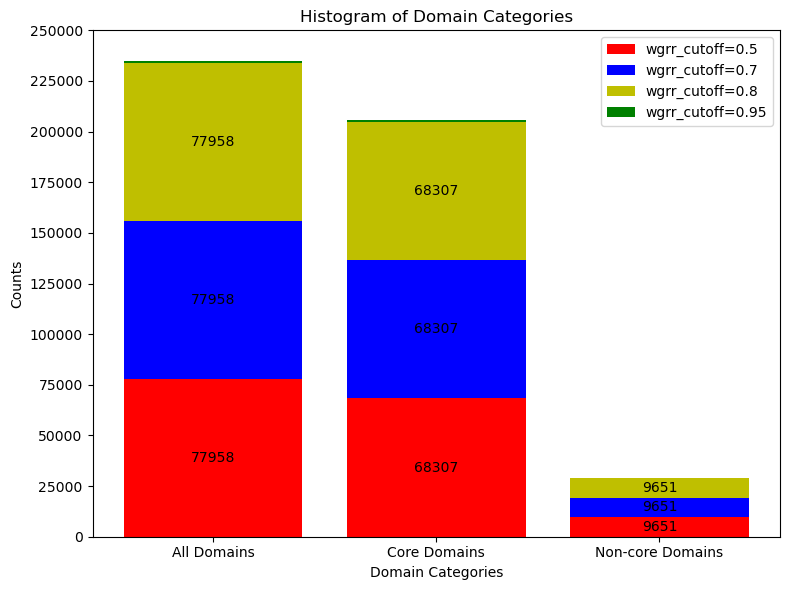

In [318]:

def count_domains(df):
    total = len(df)
    core = len(df[df['domain_category'] == 'core'])
    non_core = len(df[df['domain_category'] == 'non-core'])
    return [total, core, non_core]

counts_05 = count_domains(maniak_finali_05)
counts_07 = count_domains(maniak_finali_07)
counts_08 = count_domains(maniak_finali_08)
counts_095 = count_domains(maniak_finali_095)

# Tworzenie histogramu z trzema słupkami
categories = ['All Domains', 'Core Domains', 'Non-core Domains']
counts_05 = pd.Series(counts_05, index=categories)
counts_07 = pd.Series(counts_07, index=categories)
counts_08 = pd.Series(counts_08, index=categories)
counts_095 = pd.Series(counts_095, index=categories)

plt.figure(figsize=(8, 6))

# Tworzenie skumulowanego wykresu słupkowego
bars_05 = plt.bar(categories, counts_05, color='r', label='wgrr_cutoff=0.5')
bars_07 = plt.bar(categories, counts_07, bottom=counts_05, color='b', label='wgrr_cutoff=0.7')
bars_08 = plt.bar(categories, counts_08, bottom=counts_05+counts_07, color='y', label='wgrr_cutoff=0.8')
bars_095 = plt.bar(categories, counts_095, bottom=counts_05+counts_07+counts_08, color='g', label='wgrr_cutoff=0.95')

for i, bar in enumerate(bars_05):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, int(height), ha='center', va='center', fontsize=10, color='black')

for i, bar in enumerate(bars_07):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, counts_05[i] + height / 2, int(height), ha='center', va='center', fontsize=10, color='black')

for i, bar in enumerate(bars_08):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, counts_05[i] + counts_07[i] + height / 2, int(height), ha='center', va='center', fontsize=10, color='black')


plt.yticks(range(0, int((counts_05 + counts_07 + counts_08 + counts_095).max()) + 25000, 25000))
plt.xlabel('Domain Categories')
plt.ylabel('Counts')
plt.title('Histogram of Domain Categories')
plt.legend()
plt.tight_layout()
plt.show()

In [457]:
counts_fil = filtrowany_maniak_gotowy['t_name'].value_counts()

# Function for frequency determination
def determine_frequency(t_name):
    total_clusters = len(filtrowany_maniak_gotowy['__mclCluster'].unique())
    count = counts_fil[t_name] if t_name in counts_fil else 0
    
    # We determine the frequency based on the conditions
    if count / total_clusters >= 0.75:
        return 'frequent'
    elif count / total_clusters <= 0.25:
        return 'rare'
    else:
        return 'normal'

# Adding new ccolumn: 'frequency_of_domain'
filtrowany_maniak_gotowy['frequency_of_domain'] = filtrowany_maniak_gotowy['t_name'].apply(determine_frequency)

filtrowany_maniak_gotowy

,genome_id,gene_start,gene_end,domain_start,domain_end,t_name,t_id,f_id,func_annot,func_category,strand,domain_seq_id,__mclCluster,wgrr_cutoff,cluster_size,domain_length,gene_length,domain_seq,domain_category,frequency_of_domain
65454,NC_054899.1,19951,20340,20140,20470,Trm112p-like,4294.1.1,4294.1.1.31,NaN,NaN,-1,4086,1,0.8,82,330,389,4969.1.1|304.48.1|4970.1.1|2484.1.1|2484.1.1|3...,non-core,frequent
70756,NC_054936.1,159100,159414,159298,159586,Hypothetical protein Ta0289-C,375.1.5,375.1.5.1,NaN,NaN,-1,723,1,0.8,82,288,314,150.1.1|192.4.1|2004.1.1|377.1.1|7529.1.1|235....,non-core,normal
70755,NC_054935.2,132504,134321,134115,135834,SSHS domain in type II DNA topoisomerase,4012.1.1,4012.1.1.2,Type II TA system,antidefense,1,2110,1,0.8,82,1719,1817,206.1.3|206.1.3|206.1.3|3614.1.1|2004.1.1|2006...,non-core,frequent
70754,NC_054935.2,134590,136767,134635,135211,ATPase domain of HSP90 chaperone/DNA topoisome...,225.1.1,225.1.1.3,lysis inhibition,lysis,1,2110,1,0.8,82,576,2177,206.1.3|206.1.3|206.1.3|3614.1.1|2004.1.1|2006...,core,frequent
70753,NC_054935.2,136779,137717,136794,136944,tri-helical,101.1.1,101.1.1.364,lysis inhibition,lysis,1,2110,1,0.8,82,150,938,206.1.3|206.1.3|206.1.3|3614.1.1|2004.1.1|2006...,core,frequent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60182,NC_049951.1,22641,23711,23169,24060,DNA breaking-rejoining enzymes,101.1.8,101.1.8.21,NaN,NaN,-1,523,154,0.8,4,891,1070,101.1.9|2004.1.1|823.1.1|2486.1.1|70.4.1|2485....,core,frequent
60181,NC_049951.1,33747,34037,33747,33933,winged,101.1.2,101.1.2.147,NaN,NaN,1,523,154,0.8,4,186,290,101.1.9|2004.1.1|823.1.1|2486.1.1|70.4.1|2485....,core,frequent
60180,NC_049951.1,32153,33052,32279,32588,winged,101.1.2,101.1.2.118,NaN,NaN,1,523,154,0.8,4,309,899,101.1.9|2004.1.1|823.1.1|2486.1.1|70.4.1|2485....,core,frequent
60190,NC_049951.1,26177,26857,26177,26852,Restriction endonuclease-like,2008.1.1,2008.1.1.63,exonuclease,"DNA, RNA and nucleotide metabolism",-1,523,154,0.8,4,675,680,101.1.9|2004.1.1|823.1.1|2486.1.1|70.4.1|2485....,core,frequent


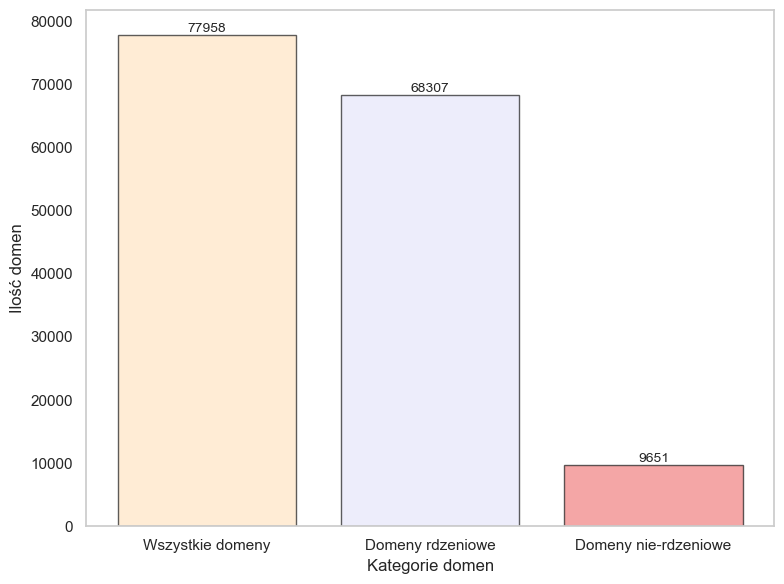

In [446]:
#total_domains = len(filtrowany_maniak_gotowy)
#core_domains = len(filtrowany_maniak_gotowy[filtrowany_maniak_gotowy['domain_category'] == 'core'])
#non_core_domains = len(filtrowany_maniak_gotowy[filtrowany_maniak_gotowy['domain_category'] == 'non-core'])

# Tworzenie histogramu z trzema słupkami
categories = ['Wszystkie domeny', 'Domeny rdzeniowe', 'Domeny nie-rdzeniowe']
counts = [total_domains, core_domains, non_core_domains]

plt.figure(figsize=(8, 6))

# Ustawienie kolorów na bardziej stonowane
bar_colors = ['bisque', 'lavender', 'lightcoral']

# Rysowanie słupków z dokładną wysokością (ilością)
bars = plt.bar(categories, counts, color=bar_colors, alpha=0.7, edgecolor='k')

# Dodanie tekstu z liczbą nad każdym słupkiem
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, count, ha='center', va='bottom', fontsize=10)

plt.xlabel('Kategorie domen')
plt.ylabel('Ilość domen')
plt.tight_layout()
plt.grid(False)
plt.show()

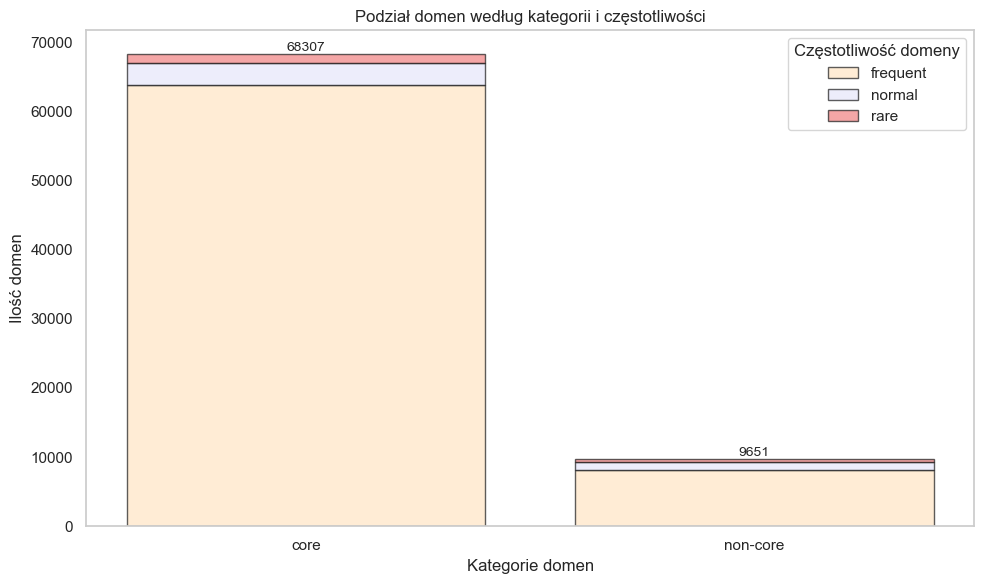

In [458]:
counts = filtrowany_maniak_gotowy.groupby(['domain_category', 'frequency_of_domain']).size().unstack(fill_value=0)

# Ustawienie kolorów dla każdej wartości częstotliwości
bar_colors = ['bisque', 'lavender', 'lightcoral']
frequency_levels = counts.columns

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 6))

# Rysowanie słupków warstwowych
bottom = pd.Series([0] * len(counts), index=counts.index)
for frequency, color in zip(frequency_levels, bar_colors):
    ax.bar(counts.index, counts[frequency], bottom=bottom, label=frequency, color=color, edgecolor='k', alpha=0.7)
    bottom += counts[frequency]

# Dodanie tekstu z liczbą nad każdym słupkiem
for i in range(len(counts)):
    total = sum(counts.iloc[i])
    ax.text(i, total + 0.3, total, ha='center', va='bottom', fontsize=10)

# Ustawienia osi i legendy
ax.set_xlabel('Kategorie domen')
ax.set_ylabel('Ilość domen')
ax.set_title('Podział domen według kategorii i częstotliwości')
ax.legend(title='Częstotliwość domeny')
ax.grid(False)
plt.tight_layout()

plt.show()

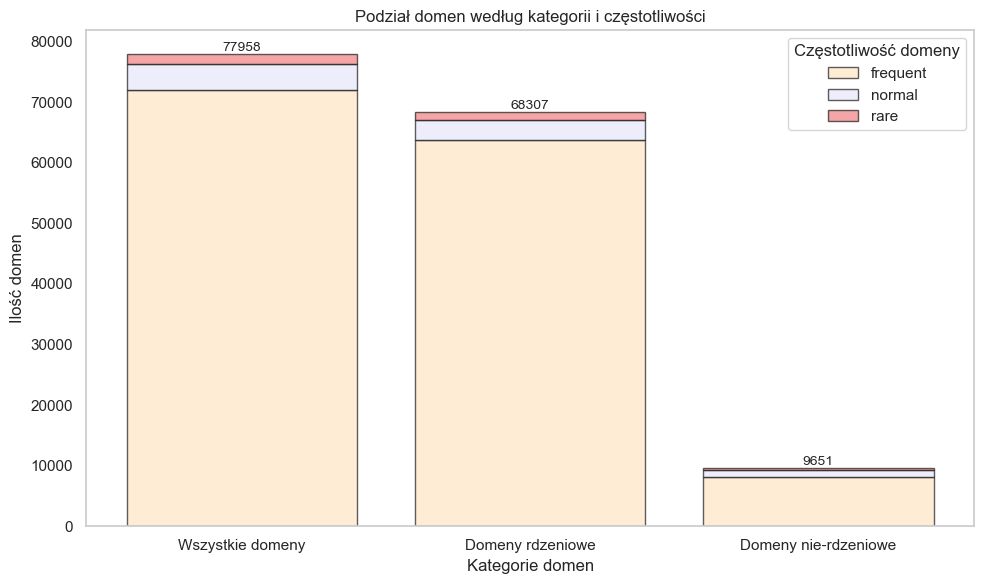

In [460]:
counts = filtrowany_maniak_gotowy.groupby(['domain_category', 'frequency_of_domain']).size().unstack(fill_value=0)

# Dodanie wiersza dla "Wszystkich domen"
all_domains_count = filtrowany_maniak_gotowy['frequency_of_domain'].value_counts().reindex(counts.columns, fill_value=0)
counts.loc['all'] = all_domains_count

# Przygotowanie danych do wykresu
total_domains = sum(all_domains_count)
core_domains = counts.loc['core'].sum()
non_core_domains = counts.loc['non-core'].sum()

# Tłumaczenie kategorii na polski
categories = ['Wszystkie domeny', 'Domeny rdzeniowe', 'Domeny nie-rdzeniowe']
counts = counts.rename(index={'all': 'Wszystkie domeny', 'core': 'Domeny rdzeniowe', 'non-core': 'Domeny nie-rdzeniowe'})

# Przygotowanie kolorów dla każdej wartości częstotliwości
bar_colors = ['bisque', 'lavender', 'lightcoral']
frequency_levels = counts.columns

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 6))

# Rysowanie słupków warstwowych
bottom = [0] * len(categories)
for frequency, color in zip(frequency_levels, bar_colors):
    heights = counts.loc[categories, frequency]
    ax.bar(categories, heights, bottom=bottom, label=frequency, color=color, edgecolor='k', alpha=0.7)
    bottom = [i + j for i, j in zip(bottom, heights)]

# Dodanie tekstu z liczbą nad każdym słupkiem
for category, total in zip(categories, [total_domains, core_domains, non_core_domains]):
    ax.text(category, total + 0.3, total, ha='center', va='bottom', fontsize=10)

# Ustawienia osi i legendy
ax.set_xlabel('Kategorie domen')
ax.set_ylabel('Ilość domen')
ax.set_title('Podział domen według kategorii i częstotliwości')
ax.legend(title='Częstotliwość domeny')
ax.grid(False)
plt.tight_layout()

plt.show()

In [141]:
data_domains_sequences = filtrowany_maniak_gotowy[['genome_id', 'domain_seq', 'domain_seq_id']]

data_domains_sequences = data_domains_sequences.drop_duplicates()

data_domains_sequences

,genome_id,domain_seq,domain_seq_id
65454,NC_054899.1,4969.1.1|304.48.1|4970.1.1|2484.1.1|2484.1.1|3...,4086
70756,NC_054936.1,150.1.1|192.4.1|2004.1.1|377.1.1|7529.1.1|235....,723
70755,NC_054935.2,206.1.3|206.1.3|206.1.3|3614.1.1|2004.1.1|2006...,2110
66681,NC_054907.1,225.1.1|225.1.1|225.1.1|212.1.1|2006.1.3|4012....,2319
66717,NC_054908.1,225.1.1|4012.1.1|2006.1.3|212.1.1|225.1.1|225....,2375
...,...,...,...
182,NC_001423.1,632.14.1|4192.1.1|2484.1.1|4968.1.1|4970.1.1|3...,4180
37217,NC_042057.1,2007.1.2|2007.1.2|2007.1.11|2007.1.2|2007.1.2|...,1950
9649,NC_019723.1,101.1.9|2004.1.1|823.1.1|2486.1.1|70.4.1|2485....,511
60156,NC_049951.1,101.1.9|2004.1.1|823.1.1|2486.1.1|70.4.1|2485....,523


In [142]:
data_clusters = filtrowany_maniak_gotowy[['__mclCluster', 'genome_id', 'cluster_size', 'wgrr_cutoff']]

data_clusters = data_clusters.drop_duplicates()

data_clusters

,__mclCluster,genome_id,cluster_size,wgrr_cutoff
65454,1,NC_054899.1,82,0.8
70756,1,NC_054936.1,82,0.8
70755,1,NC_054935.2,82,0.8
66681,1,NC_054907.1,82,0.8
66717,1,NC_054908.1,82,0.8
...,...,...,...,...
182,153,NC_001423.1,4,0.8
37217,154,NC_042057.1,4,0.8
9649,154,NC_019723.1,4,0.8
60156,154,NC_049951.1,4,0.8


In [143]:
data_domains_info = filtrowany_maniak_gotowy[['genome_id', 'domain_start', 'domain_end', 't_name', 't_id', 'f_id', 'domain_seq_id', 'domain_length', 'domain_category', 'strand']]

data_domains_info

,genome_id,domain_start,domain_end,t_name,t_id,f_id,domain_seq_id,domain_length,domain_category,strand
65454,NC_054899.1,20140,20470,Trm112p-like,4294.1.1,4294.1.1.31,4086,330,non-core,-1
70756,NC_054936.1,159298,159586,Hypothetical protein Ta0289-C,375.1.5,375.1.5.1,723,288,non-core,-1
70755,NC_054935.2,134115,135834,SSHS domain in type II DNA topoisomerase,4012.1.1,4012.1.1.2,2110,1719,non-core,1
70754,NC_054935.2,134635,135211,ATPase domain of HSP90 chaperone/DNA topoisome...,225.1.1,225.1.1.3,2110,576,core,1
70753,NC_054935.2,136794,136944,tri-helical,101.1.1,101.1.1.364,2110,150,core,1
...,...,...,...,...,...,...,...,...,...,...
60182,NC_049951.1,23169,24060,DNA breaking-rejoining enzymes,101.1.8,101.1.8.21,523,891,core,-1
60181,NC_049951.1,33747,33933,winged,101.1.2,101.1.2.147,523,186,core,1
60180,NC_049951.1,32279,32588,winged,101.1.2,101.1.2.118,523,309,core,1
60190,NC_049951.1,26177,26852,Restriction endonuclease-like,2008.1.1,2008.1.1.63,523,675,core,-1


In [450]:
non_core_df = data_domains_info[data_domains_info['domain_category'] == 'non-core']

# Policz liczbę domen non-core dla każdego genomu
non_core_counts = non_core_df['genome_id'].value_counts()

# Oblicz średnią liczbę domen non-core na genom
average_non_core_per_genome = non_core_counts.median()

print(f"Średnia liczba domen non-core na jeden genom: {average_non_core_per_genome}")

Średnia liczba domen non-core na jeden genom: 5.0


In [71]:
filtrowany_maniak_gotowy.to_csv('ready_data_final_version.csv', index=False)

In [159]:
data_genomes = filtrowany_maniak_gotowy[['genome_id']]

In [160]:
data_genomes = data_genomes.drop_duplicates()

data_genomes

,genome_id
65454,NC_054899.1
70756,NC_054936.1
70755,NC_054935.2
66681,NC_054907.1
66717,NC_054908.1
...,...
182,NC_001423.1
37217,NC_042057.1
9649,NC_019723.1
60156,NC_049951.1


In [169]:
from Bio import Entrez, SeqIO
import pandas as pd

# Ustaw swój adres email tutaj
Entrez.email = "your_email@example.com"

# Funkcja do pobierania rekordu genomu i wyciągania "family" i "genus"
def fetch_taxonomy(genome_id):
    handle = Entrez.efetch(db="nuccore", id=genome_id, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    handle.close()
    
    taxonomy = record.annotations.get("taxonomy", [])
    family = "no_family"
    genus = "no_genus"
    for tax in taxonomy:
        if tax.lower().endswith("viridae"):
            family = tax
        elif tax.lower().endswith("virus") and not tax.lower().endswith("viridae"):
            genus = tax
    
    return family, genus

# Przykładowe dane


# Tworzenie nowych kolumn "family" i "genus"
data_genomes["family"] = ""
data_genomes["genus"] = ""

# Iteracja po identyfikatorach genomów
for index, row in data_genomes.iterrows():
    genome_id = row["genome_id"]
    family, genus = fetch_taxonomy(genome_id)
    data_genomes.at[index, "family"] = family
    data_genomes.at[index, "genus"] = genus
    # Wyświetlanie komunikatu po zapisaniu każdego wiersza
    print(f'Taxonomy of "{genome_id}" saved!')


Taxonomy of "NC_054899.1" saved!
Taxonomy of "NC_054936.1" saved!
Taxonomy of "NC_054935.2" saved!
Taxonomy of "NC_054907.1" saved!
Taxonomy of "NC_054908.1" saved!
Taxonomy of "NC_028780.1" saved!
Taxonomy of "NC_054906.1" saved!
Taxonomy of "NC_054934.1" saved!
Taxonomy of "NC_054905.1" saved!
Taxonomy of "NC_054904.1" saved!
Taxonomy of "NC_054937.1" saved!
Taxonomy of "NC_054910.1" saved!
Taxonomy of "NC_054911.1" saved!
Taxonomy of "NC_054909.1" saved!
Taxonomy of "NC_054932.1" saved!
Taxonomy of "NC_054931.1" saved!
Taxonomy of "NC_054912.1" saved!
Taxonomy of "NC_054933.1" saved!
Taxonomy of "NC_054943.1" saved!
Taxonomy of "NC_054942.1" saved!
Taxonomy of "NC_054900.1" saved!
Taxonomy of "NC_054944.1" saved!
Taxonomy of "NC_054901.1" saved!
Taxonomy of "NC_054920.1" saved!
Taxonomy of "NC_054941.1" saved!
Taxonomy of "NC_019503.1" saved!
Taxonomy of "NC_019505.1" saved!
Taxonomy of "NC_054939.1" saved!
Taxonomy of "NC_054938.1" saved!
Taxonomy of "NC_054903.1" saved!
Taxonomy o

In [320]:
data_genomes

,genome_id,family,genus
65454,NC_054899.1,Straboviridae,Tequatrovirus
70756,NC_054936.1,Straboviridae,Tequatrovirus
70755,NC_054935.2,Straboviridae,Tequatrovirus
66681,NC_054907.1,Straboviridae,Tequatrovirus
66717,NC_054908.1,Straboviridae,Tequatrovirus
...,...,...,...
182,NC_001423.1,Salasmaviridae,Salasvirus
37217,NC_042057.1,no_family,Lambdavirus
9649,NC_019723.1,no_family,Lambdavirus
60156,NC_049951.1,no_family,Lambdavirus


In [319]:
non_core_dom = filtrowany_maniak_gotowy[filtrowany_maniak_gotowy['domain_category'] == 'non-core']

non_core_dom

,genome_id,gene_start,gene_end,domain_start,domain_end,t_name,t_id,f_id,func_annot,func_category,strand,domain_seq_id,__mclCluster,wgrr_cutoff,cluster_size,domain_length,gene_length,domain_seq,domain_category
65454,NC_054899.1,19951,20340,20140,20470,Trm112p-like,4294.1.1,4294.1.1.31,NaN,NaN,-1,4086,1,0.8,82,330,389,4969.1.1|304.48.1|4970.1.1|2484.1.1|2484.1.1|3...,non-core
70756,NC_054936.1,159100,159414,159298,159586,Hypothetical protein Ta0289-C,375.1.5,375.1.5.1,NaN,NaN,-1,723,1,0.8,82,288,314,150.1.1|192.4.1|2004.1.1|377.1.1|7529.1.1|235....,non-core
70755,NC_054935.2,132504,134321,134115,135834,SSHS domain in type II DNA topoisomerase,4012.1.1,4012.1.1.2,Type II TA system,antidefense,1,2110,1,0.8,82,1719,1817,206.1.3|206.1.3|206.1.3|3614.1.1|2004.1.1|2006...,non-core
70737,NC_054935.2,145058,145336,145058,145331,DNA Mimic Protein Arn,6141.1.1,6141.1.1.1,inhibitor of MrcBC restriction,"moron, auxiliary metabolic gene and host takeover",1,2110,1,0.8,82,273,278,206.1.3|206.1.3|206.1.3|3614.1.1|2004.1.1|2006...,non-core
70735,NC_054935.2,91194,91583,91383,91713,Trm112p-like,4294.1.1,4294.1.1.31,NaN,NaN,1,2110,1,0.8,82,330,389,206.1.3|206.1.3|206.1.3|3614.1.1|2004.1.1|2006...,non-core
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,NC_001416.1,19650,20855,19680,19935,Prealbumin-like,11.1.4,11.1.4.43,tail fiber,tail,1,514,154,0.8,4,255,1205,101.1.9|2004.1.1|823.1.1|2486.1.1|70.4.1|2485....,non-core
60187,NC_049951.1,33747,34037,33759,33870,helical bundles in heme iron utilization prote...,101.29.1,101.29.1.9,NaN,NaN,1,523,154,0.8,4,111,290,101.1.9|2004.1.1|823.1.1|2486.1.1|70.4.1|2485....,non-core
60185,NC_049951.1,34488,35420,34542,35181,HUP domains,2005.1.1,2005.1.1.13,NaN,NaN,1,523,154,0.8,4,639,932,101.1.9|2004.1.1|823.1.1|2486.1.1|70.4.1|2485....,non-core
60184,NC_049951.1,34111,34551,34111,34528,NinB,829.1.1,829.1.1.NA,recombination mediator,"DNA, RNA and nucleotide metabolism",1,523,154,0.8,4,417,440,101.1.9|2004.1.1|823.1.1|2486.1.1|70.4.1|2485....,non-core


In [171]:
frequency_data = non_core_dom[['genome_id', 't_name', '__mclCluster']]

frequency_data

,genome_id,t_name,__mclCluster
65454,NC_054899.1,Trm112p-like,1
70756,NC_054936.1,Hypothetical protein Ta0289-C,1
70755,NC_054935.2,SSHS domain in type II DNA topoisomerase,1
70737,NC_054935.2,DNA Mimic Protein Arn,1
70735,NC_054935.2,Trm112p-like,1
...,...,...,...
140,NC_001416.1,Prealbumin-like,154
60187,NC_049951.1,helical bundles in heme iron utilization prote...,154
60185,NC_049951.1,HUP domains,154
60184,NC_049951.1,NinB,154


In [172]:
counts = frequency_data['t_name'].value_counts()

# Funkcja do określania częstotliwości
def determine_frequency(t_name):
    total_clusters = len(frequency_data['__mclCluster'].unique())
    count = counts[t_name] if t_name in counts else 0
    
    # Określamy częstotliwość na podstawie warunków
    if count / total_clusters >= 0.75:
        return 'frequent'
    elif count / total_clusters <= 0.25:
        return 'rare'
    else:
        return 'normal'

# Dodajemy nową kolumnę 'frequency_of_domain'
frequency_data['frequency_of_domain'] = frequency_data['t_name'].apply(determine_frequency)

frequency_data

C:\Users\maksn\AppData\Local\Temp\ipykernel_13064\4129812698.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequency_data['frequency_of_domain'] = frequency_data['t_name'].apply(determine_frequency)


,genome_id,t_name,__mclCluster,frequency_of_domain
65454,NC_054899.1,Trm112p-like,1,normal
70756,NC_054936.1,Hypothetical protein Ta0289-C,1,normal
70755,NC_054935.2,SSHS domain in type II DNA topoisomerase,1,normal
70737,NC_054935.2,DNA Mimic Protein Arn,1,normal
70735,NC_054935.2,Trm112p-like,1,normal
...,...,...,...,...
140,NC_001416.1,Prealbumin-like,154,rare
60187,NC_049951.1,helical bundles in heme iron utilization prote...,154,normal
60185,NC_049951.1,HUP domains,154,normal
60184,NC_049951.1,NinB,154,rare


In [321]:
frequency_data = frequency_data[['frequency_of_domain']]

frequency_data

,frequency_of_domain
65454,normal
70756,normal
70755,normal
70737,normal
70735,normal
...,...
140,rare
60187,normal
60185,normal
60184,rare


In [322]:
df_non_core = pd.concat([non_core_dom, frequency_data], axis=1)

In [324]:
non_core_domains = pd.merge(df_non_core, data_genomes, on='genome_id')

In [333]:
value_counts = non_core_domains['t_name'].value_counts()

In [334]:
median_value = value_counts.median()
std_deviation = value_counts.std()

In [335]:
threshold = median_value + std_deviation

threshold

76.55626527078205

In [336]:
filtered_non_core_domains = non_core_domains[non_core_domains['t_name'].map(value_counts) > threshold]

In [338]:
value_counts = filtered_non_core_domains['t_name'].value_counts().sort_values(ascending=False)

In [339]:
value_counts_top = value_counts.head(10)

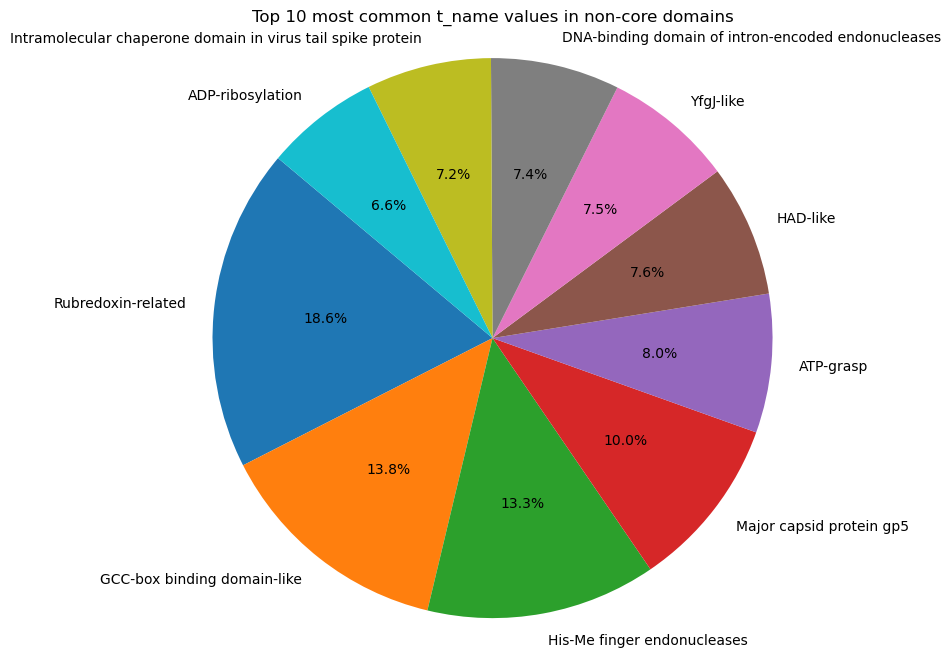

In [340]:
labels = value_counts_top.index
sizes = value_counts_top.values

# Stwórz wykres pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 most common t_name values in non-core domains')
plt.axis('equal')  # Ustawienie osi na równą, aby wykres był kołem
plt.show()

In [341]:
value_counts_normal = value_counts

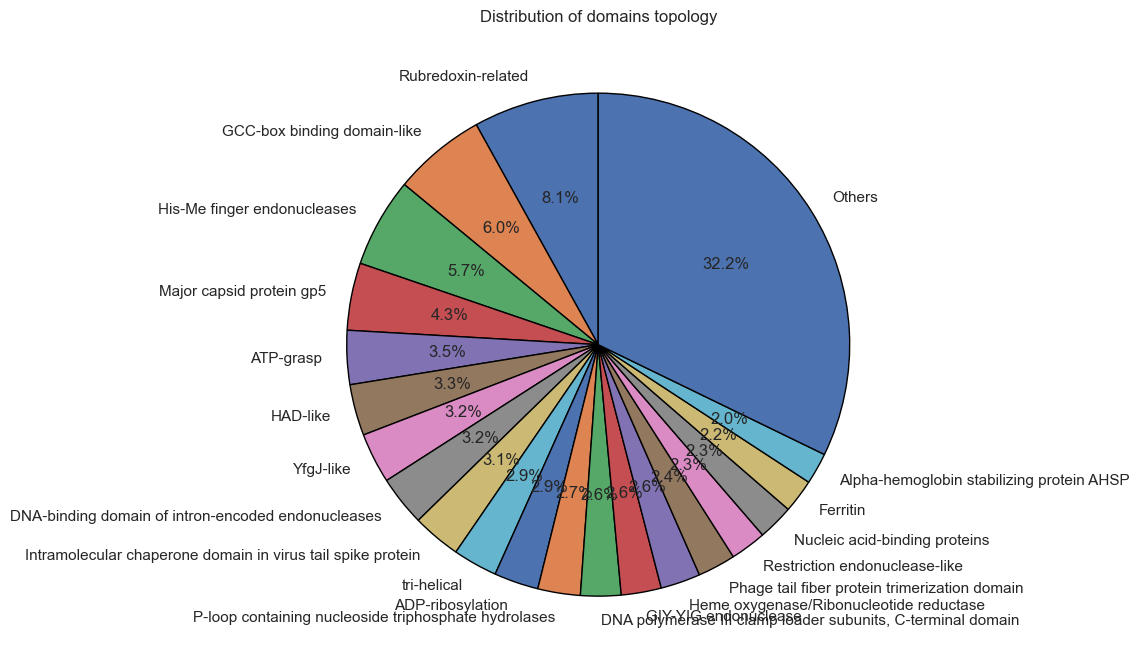

In [402]:
t_name_counts = filtered_non_core_domains['t_name'].value_counts()
total_counts = t_name_counts.sum()
percentages = (t_name_counts / total_counts) * 100

# Tworzenie nowej serii z kategorią "others"
t_name_percent_others = percentages[percentages < 2.0]
t_name_percent_main = percentages[percentages >= 2.0]
t_name_percent_main['Others'] = t_name_percent_others.sum()



plt.figure(figsize=(10, 8))
plt.pie(t_name_percent_main, 
        labels=t_name_percent_main.index, 
        autopct='%1.1f%%',  # Procenty na fragmentach
        startangle=90,  # Początkowy kąt rysowania wykresu
        wedgeprops={'edgecolor': 'black'})  # Kolor krawędzi

plt.title('Distribution of domains topology')
plt.tight_layout()
plt.show()

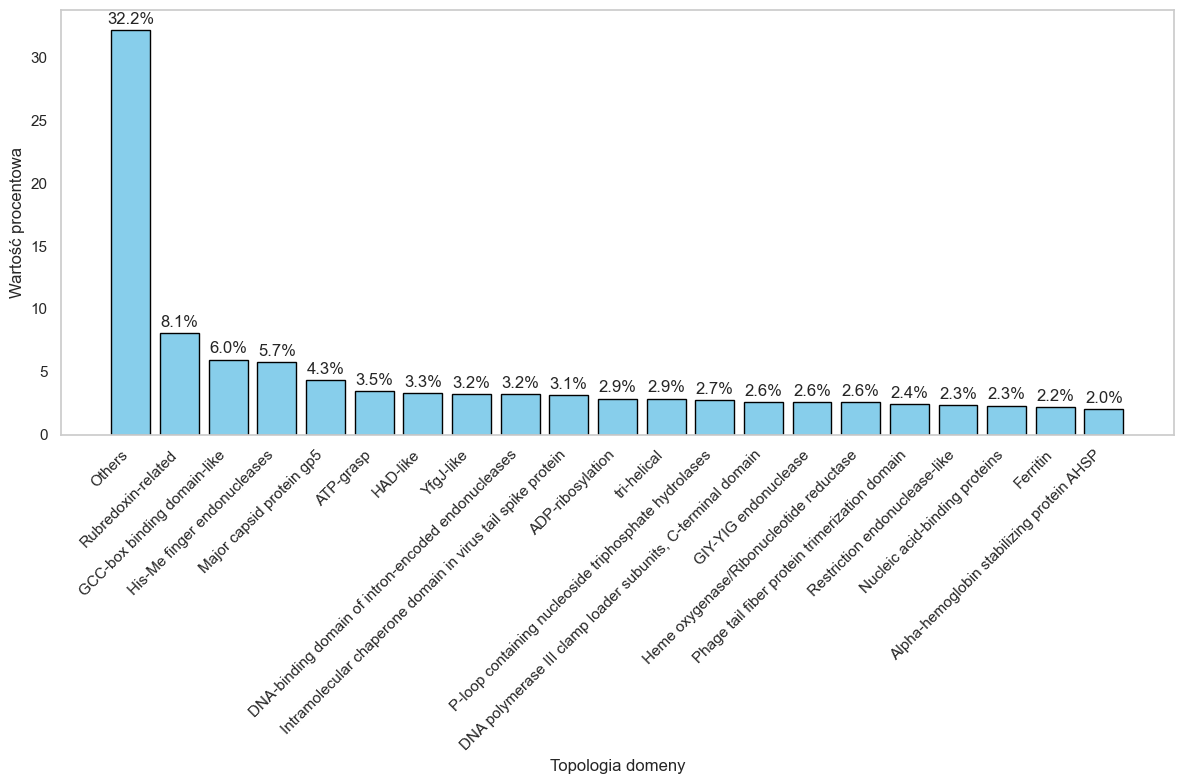

In [448]:
t_name_counts = filtered_non_core_domains['t_name'].value_counts()
total_counts = t_name_counts.sum()
percentages = (t_name_counts / total_counts) * 100

# Tworzenie nowej serii z kategorią "others"
t_name_percent_others = percentages[percentages < 2.0]
t_name_percent_main = percentages[percentages >= 2.0]
t_name_percent_main['Others'] = t_name_percent_others.sum()

# Przygotowanie danych do wykresu słupkowego
t_name_percent_main = t_name_percent_main.sort_values(ascending=False)  # Sortowanie malejąco

# Tworzenie wykresu słupkowego
plt.figure(figsize=(12, 8))
plt.bar(t_name_percent_main.index, t_name_percent_main.values, color='skyblue', edgecolor='black')

# Dodawanie etykiet do osi
plt.xlabel('Topologia domeny')
plt.ylabel('Wartość procentowa')
#plt.title('Rozkład topologii domen ECOD')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.tight_layout()

# Dodawanie etykiet z wartościami procentowymi nad słupkami
for index, value in enumerate(t_name_percent_main.values):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center')

plt.show()

In [343]:
value_counts_normal

t_name
Rubredoxin-related                                                     460
GCC-box binding domain-like                                            340
His-Me finger endonucleases                                            328
Major capsid protein gp5                                               247
ATP-grasp                                                              198
HAD-like                                                               188
YfgJ-like                                                              185
DNA-binding domain of intron-encoded endonucleases                     184
Intramolecular chaperone domain in virus tail spike protein            178
ADP-ribosylation                                                       163
tri-helical                                                            163
P-loop containing nucleoside triphosphate hydrolases                   156
DNA polymerase III clamp loader subunits, C-terminal domain            148
GIY-YIG endonuclea

In [345]:
filtered_non_core_domains.to_csv('results_final_final.csv')

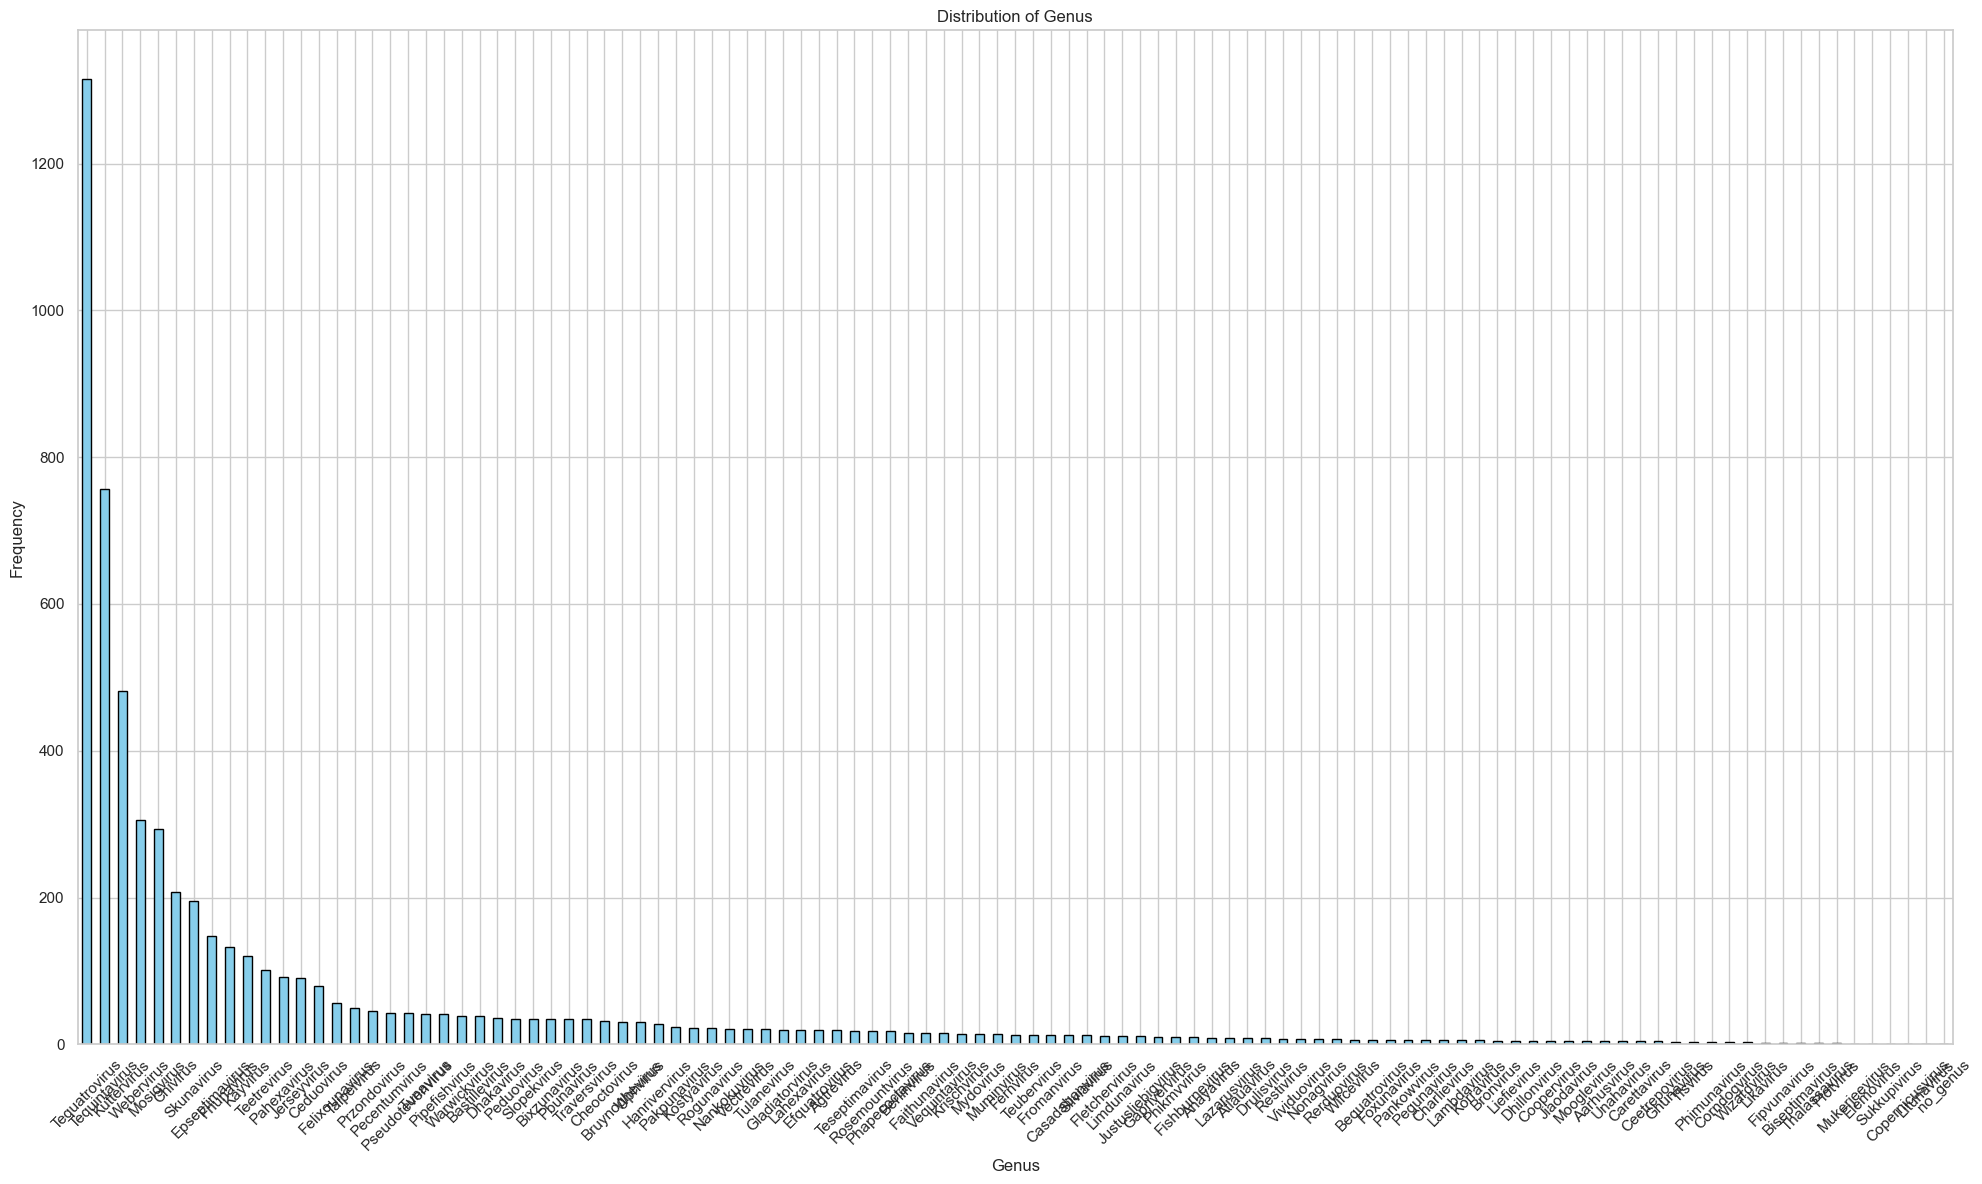

In [470]:
genus_counts = filtered_non_core_domains['genus'].value_counts()

# Narysuj wykres słupkowy
plt.figure(figsize=(20, 12))
genus_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Genus')
plt.ylabel('Frequency')
plt.title('Distribution of Genus')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [471]:
genus_counts

genus
Tequatrovirus      1316
Tequintavirus       757
Kuttervirus         482
Webervirus          305
Mosigvirus          294
                   ... 
Elemovirus            1
Sukkupivirus          1
Copernicusvirus       1
Litunavirus           1
no_genus              1
Name: count, Length: 105, dtype: int64

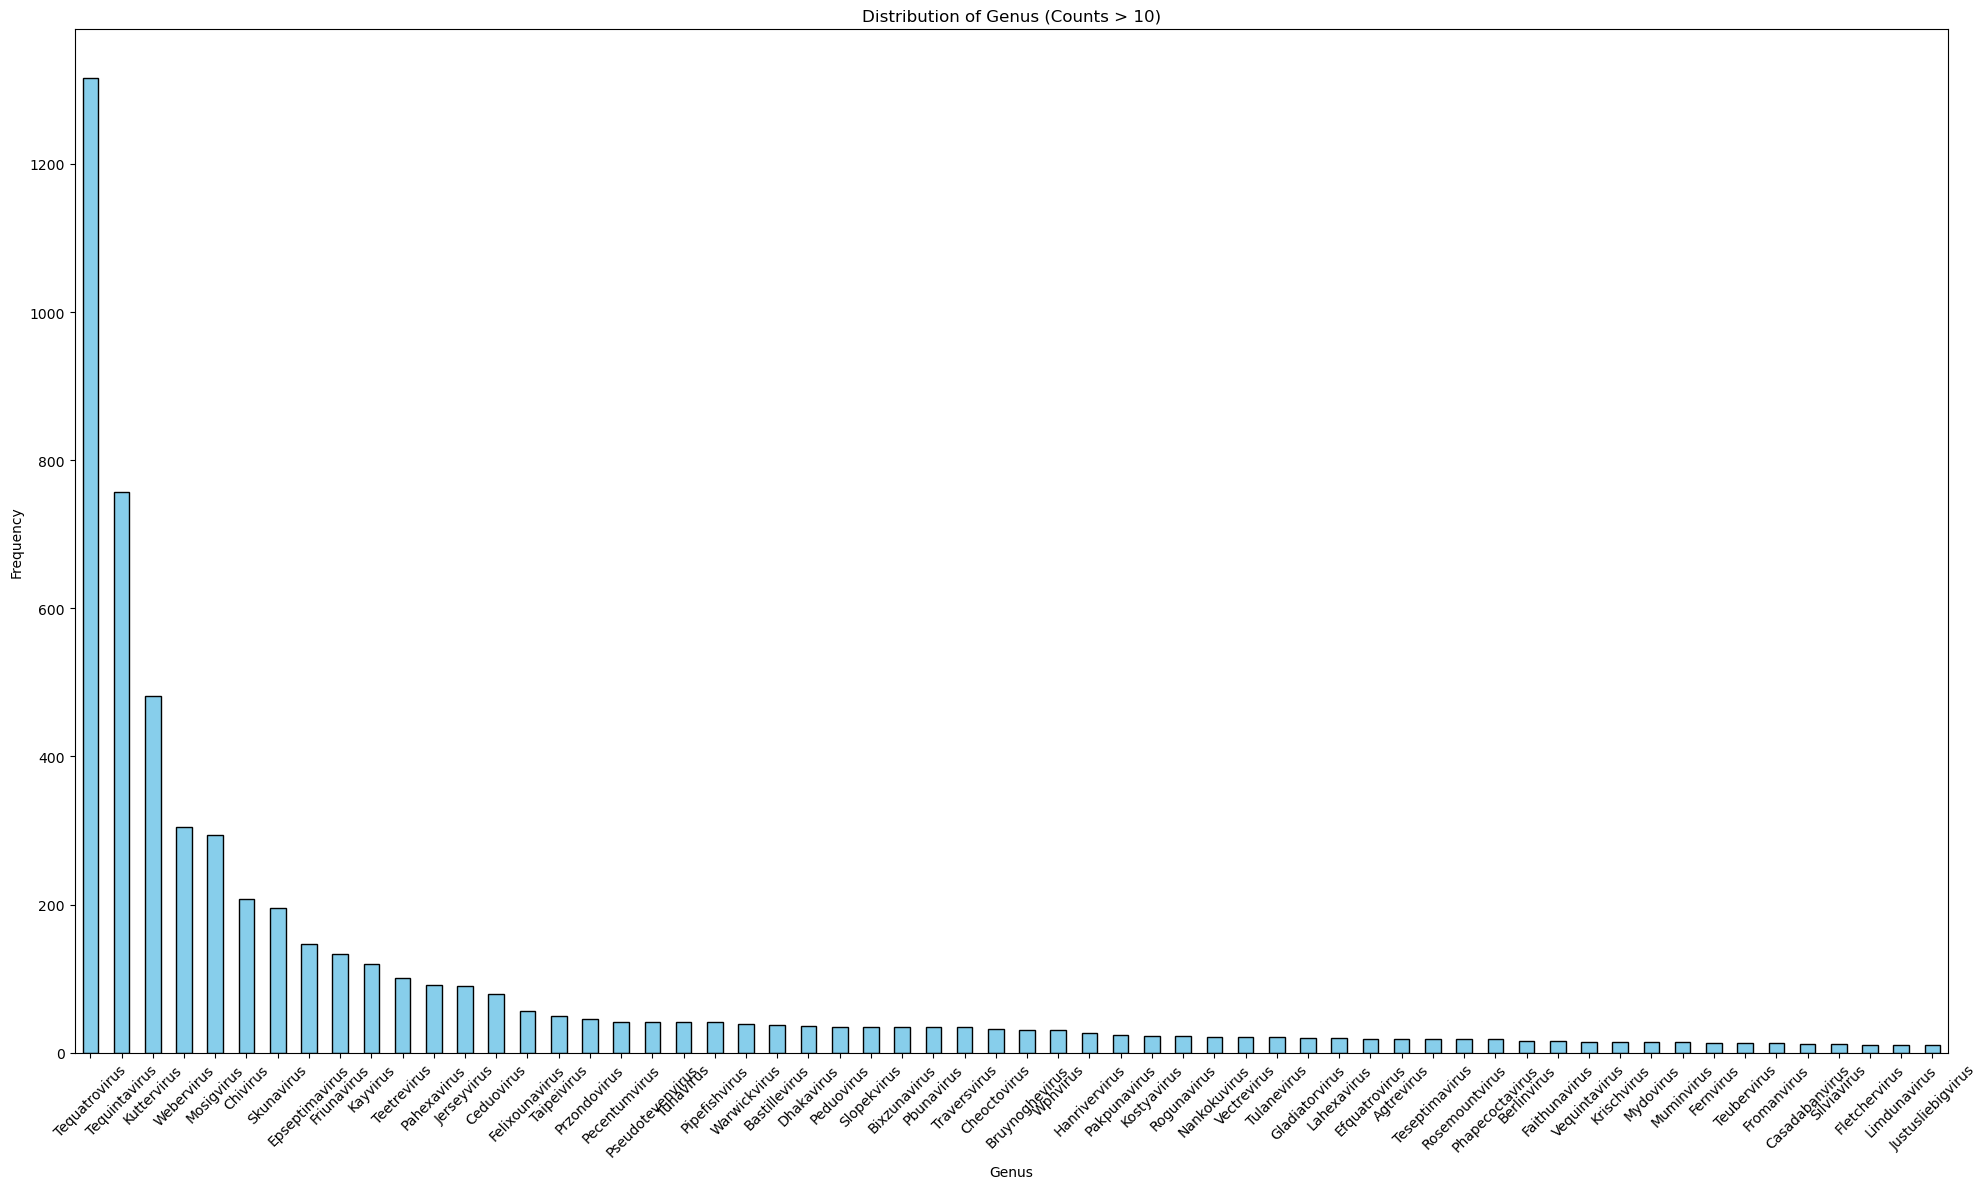

In [349]:
filtered_genus_counts = genus_counts[genus_counts > 10]

# Narysuj wykres słupkowy
plt.figure(figsize=(20, 12))
filtered_genus_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Genus')
plt.ylabel('Frequency')
plt.title('Distribution of Genus (Counts > 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

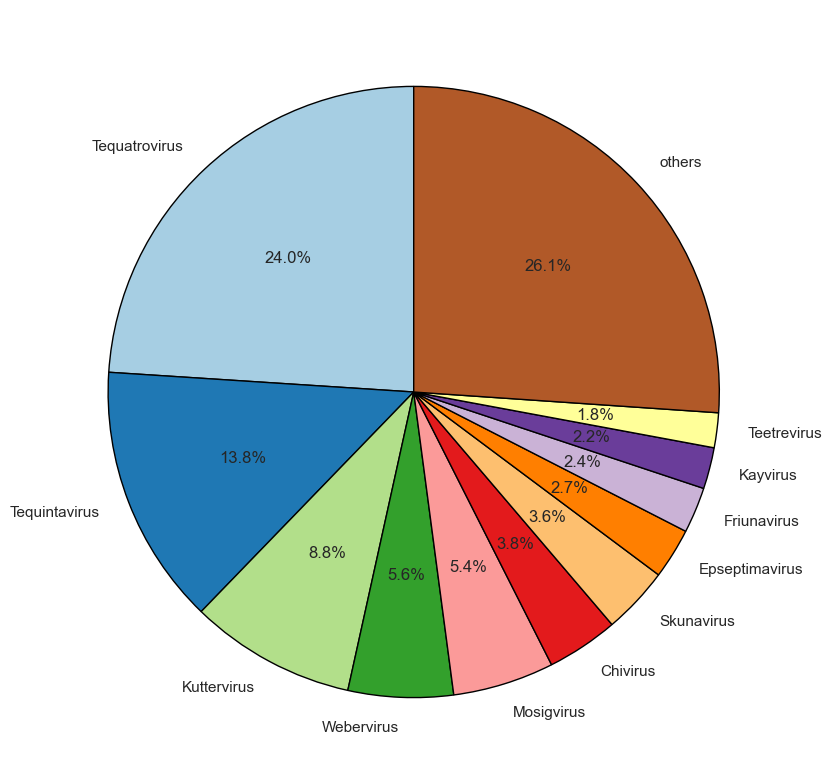

In [463]:
total_counts = filtered_genus_counts.sum()
percentages = (filtered_genus_counts / total_counts) * 100

# Tworzenie nowej serii z kategorią "others"
others_count = filtered_genus_counts[percentages < 1.8].sum()
main_genus_counts = filtered_genus_counts[percentages >= 1.8]

if others_count > 0:
    main_genus_counts['others'] = others_count

# Rysowanie wykresu kołowego
plt.figure(figsize=(10, 8))
plt.pie(main_genus_counts, 
        labels=main_genus_counts.index, 
        autopct='%1.1f%%',  # Procenty na fragmentach
        colors=plt.cm.Paired(range(len(main_genus_counts))),  # Kolory
        startangle=90,  # Początkowy kąt rysowania wykresu
        wedgeprops={'edgecolor': 'black'})  # Kolor krawędzi

#plt.title('Distribution of Genus (Counts > 10)')
plt.tight_layout()
plt.show()

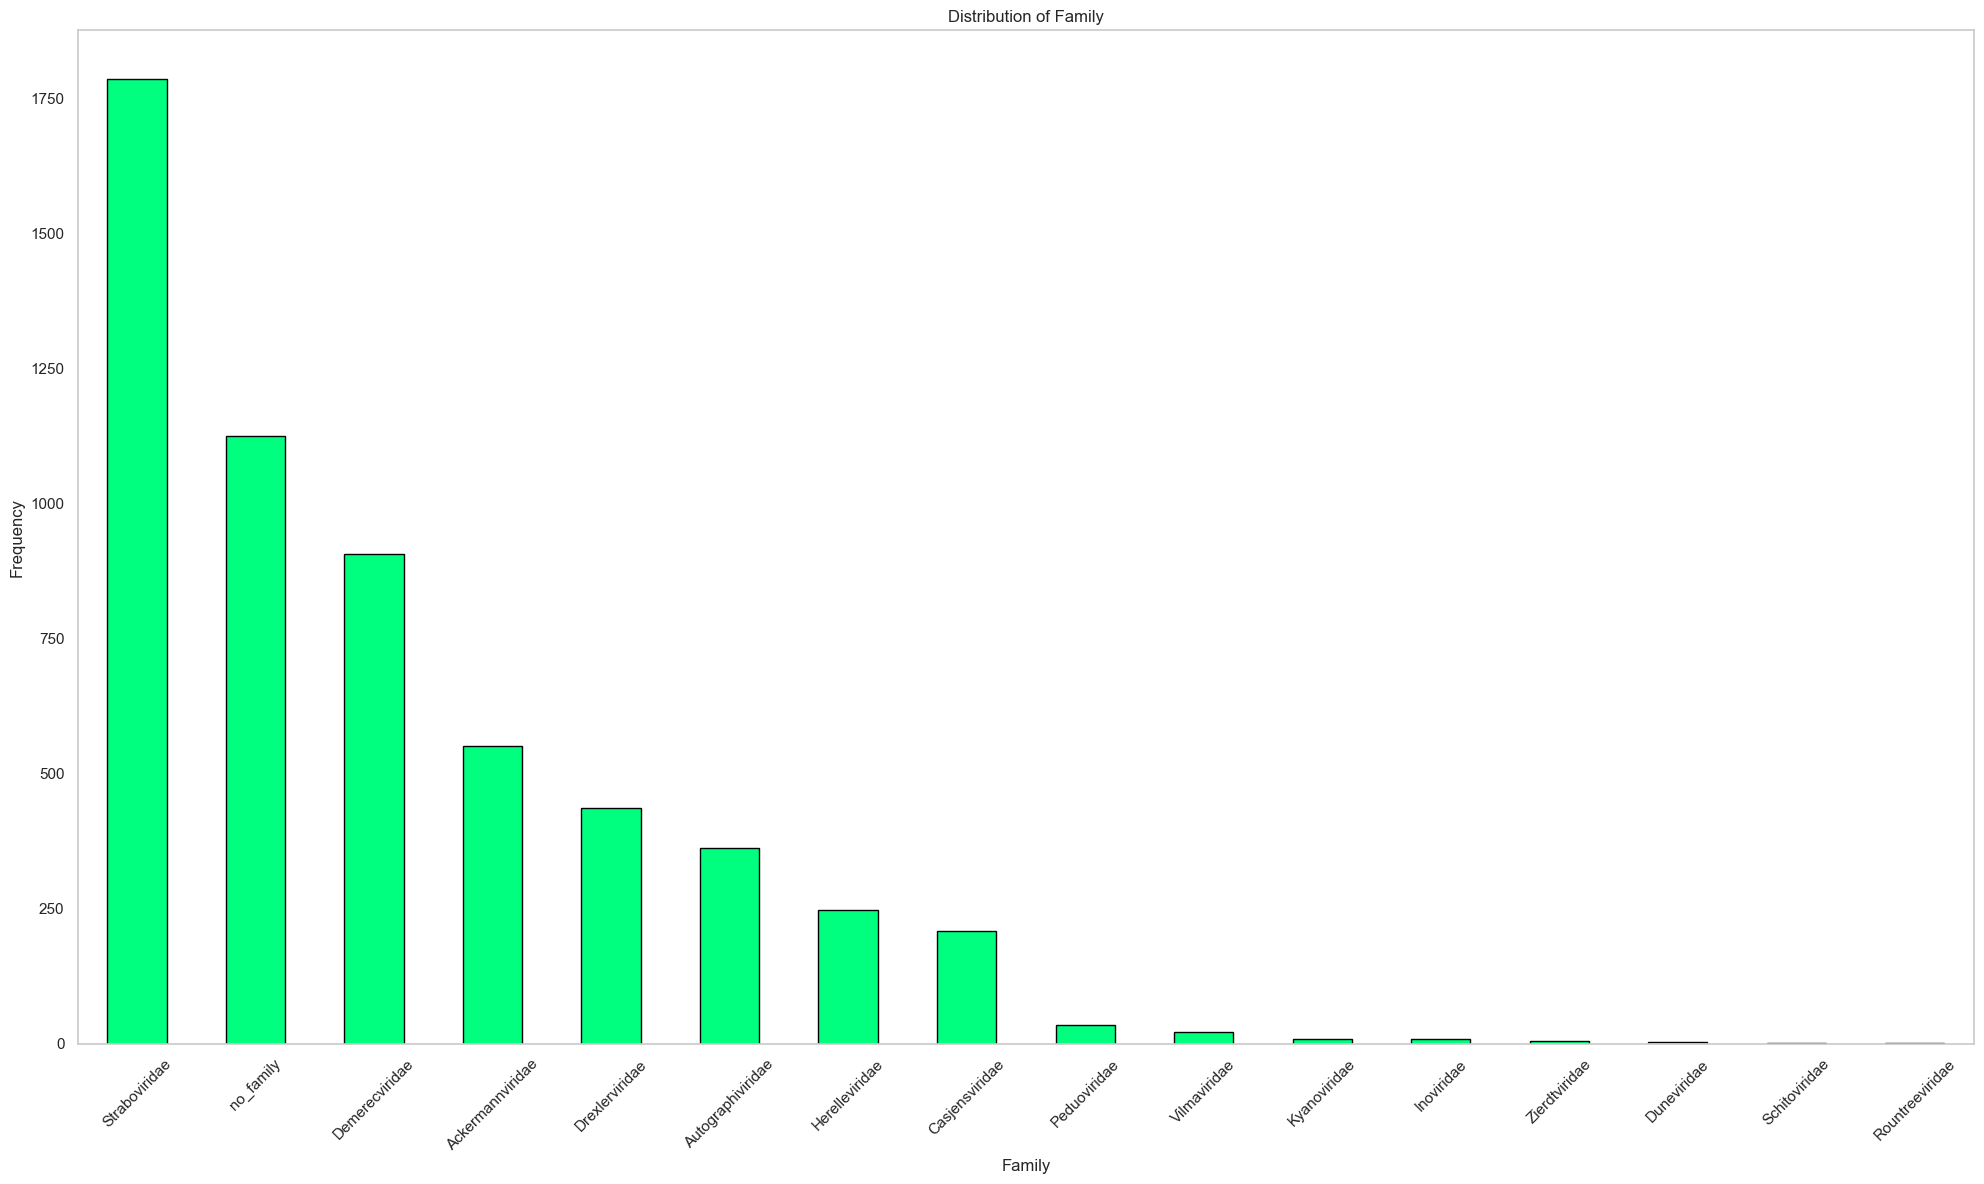

In [378]:
family_counts = filtered_non_core_domains['family'].value_counts()

# Narysuj wykres słupkowy
plt.figure(figsize=(20, 12))
family_counts.plot(kind='bar', color='springgreen', edgecolor='black')
plt.xlabel('Family')
plt.ylabel('Frequency')
plt.title('Distribution of Family')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

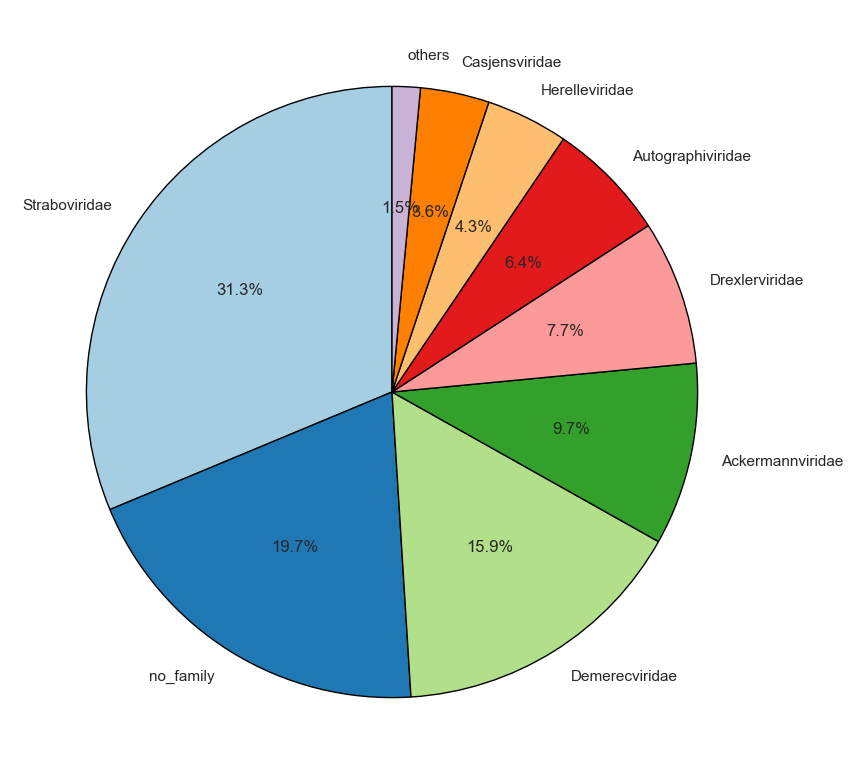

In [467]:
total_counts = family_counts.sum()
percentages = (family_counts / total_counts) * 100

# Tworzenie nowej serii z kategorią "others"
others_count = family_counts[percentages < 3.6].sum()
main_genus_counts = family_counts[percentages >= 3.6]

if others_count > 0:
    main_genus_counts['others'] = others_count

# Rysowanie wykresu kołowego
plt.figure(figsize=(10, 8))
plt.pie(main_genus_counts, 
        labels=main_genus_counts.index, 
        autopct='%1.1f%%',  # Procenty na fragmentach
        colors=plt.cm.Paired(range(len(main_genus_counts))),  # Kolory
        startangle=90,  # Początkowy kąt rysowania wykresu
        wedgeprops={'edgecolor': 'black'})  # Kolor krawędzi

#plt.title('Distribution of Family')
plt.tight_layout()
plt.show()

In [469]:
family_counts

family
Straboviridae        1786
no_family            1125
Demerecviridae        906
Ackermannviridae      551
Drexlerviridae        437
Autographiviridae     363
Herelleviridae        248
Casjensviridae        208
Peduoviridae           35
Vilmaviridae           21
Kyanoviridae            9
Inoviridae              8
Zierdtviridae           5
Duneviridae             4
Schitoviridae           2
Rountreeviridae         1
Name: count, dtype: int64

c:\Users\maksn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


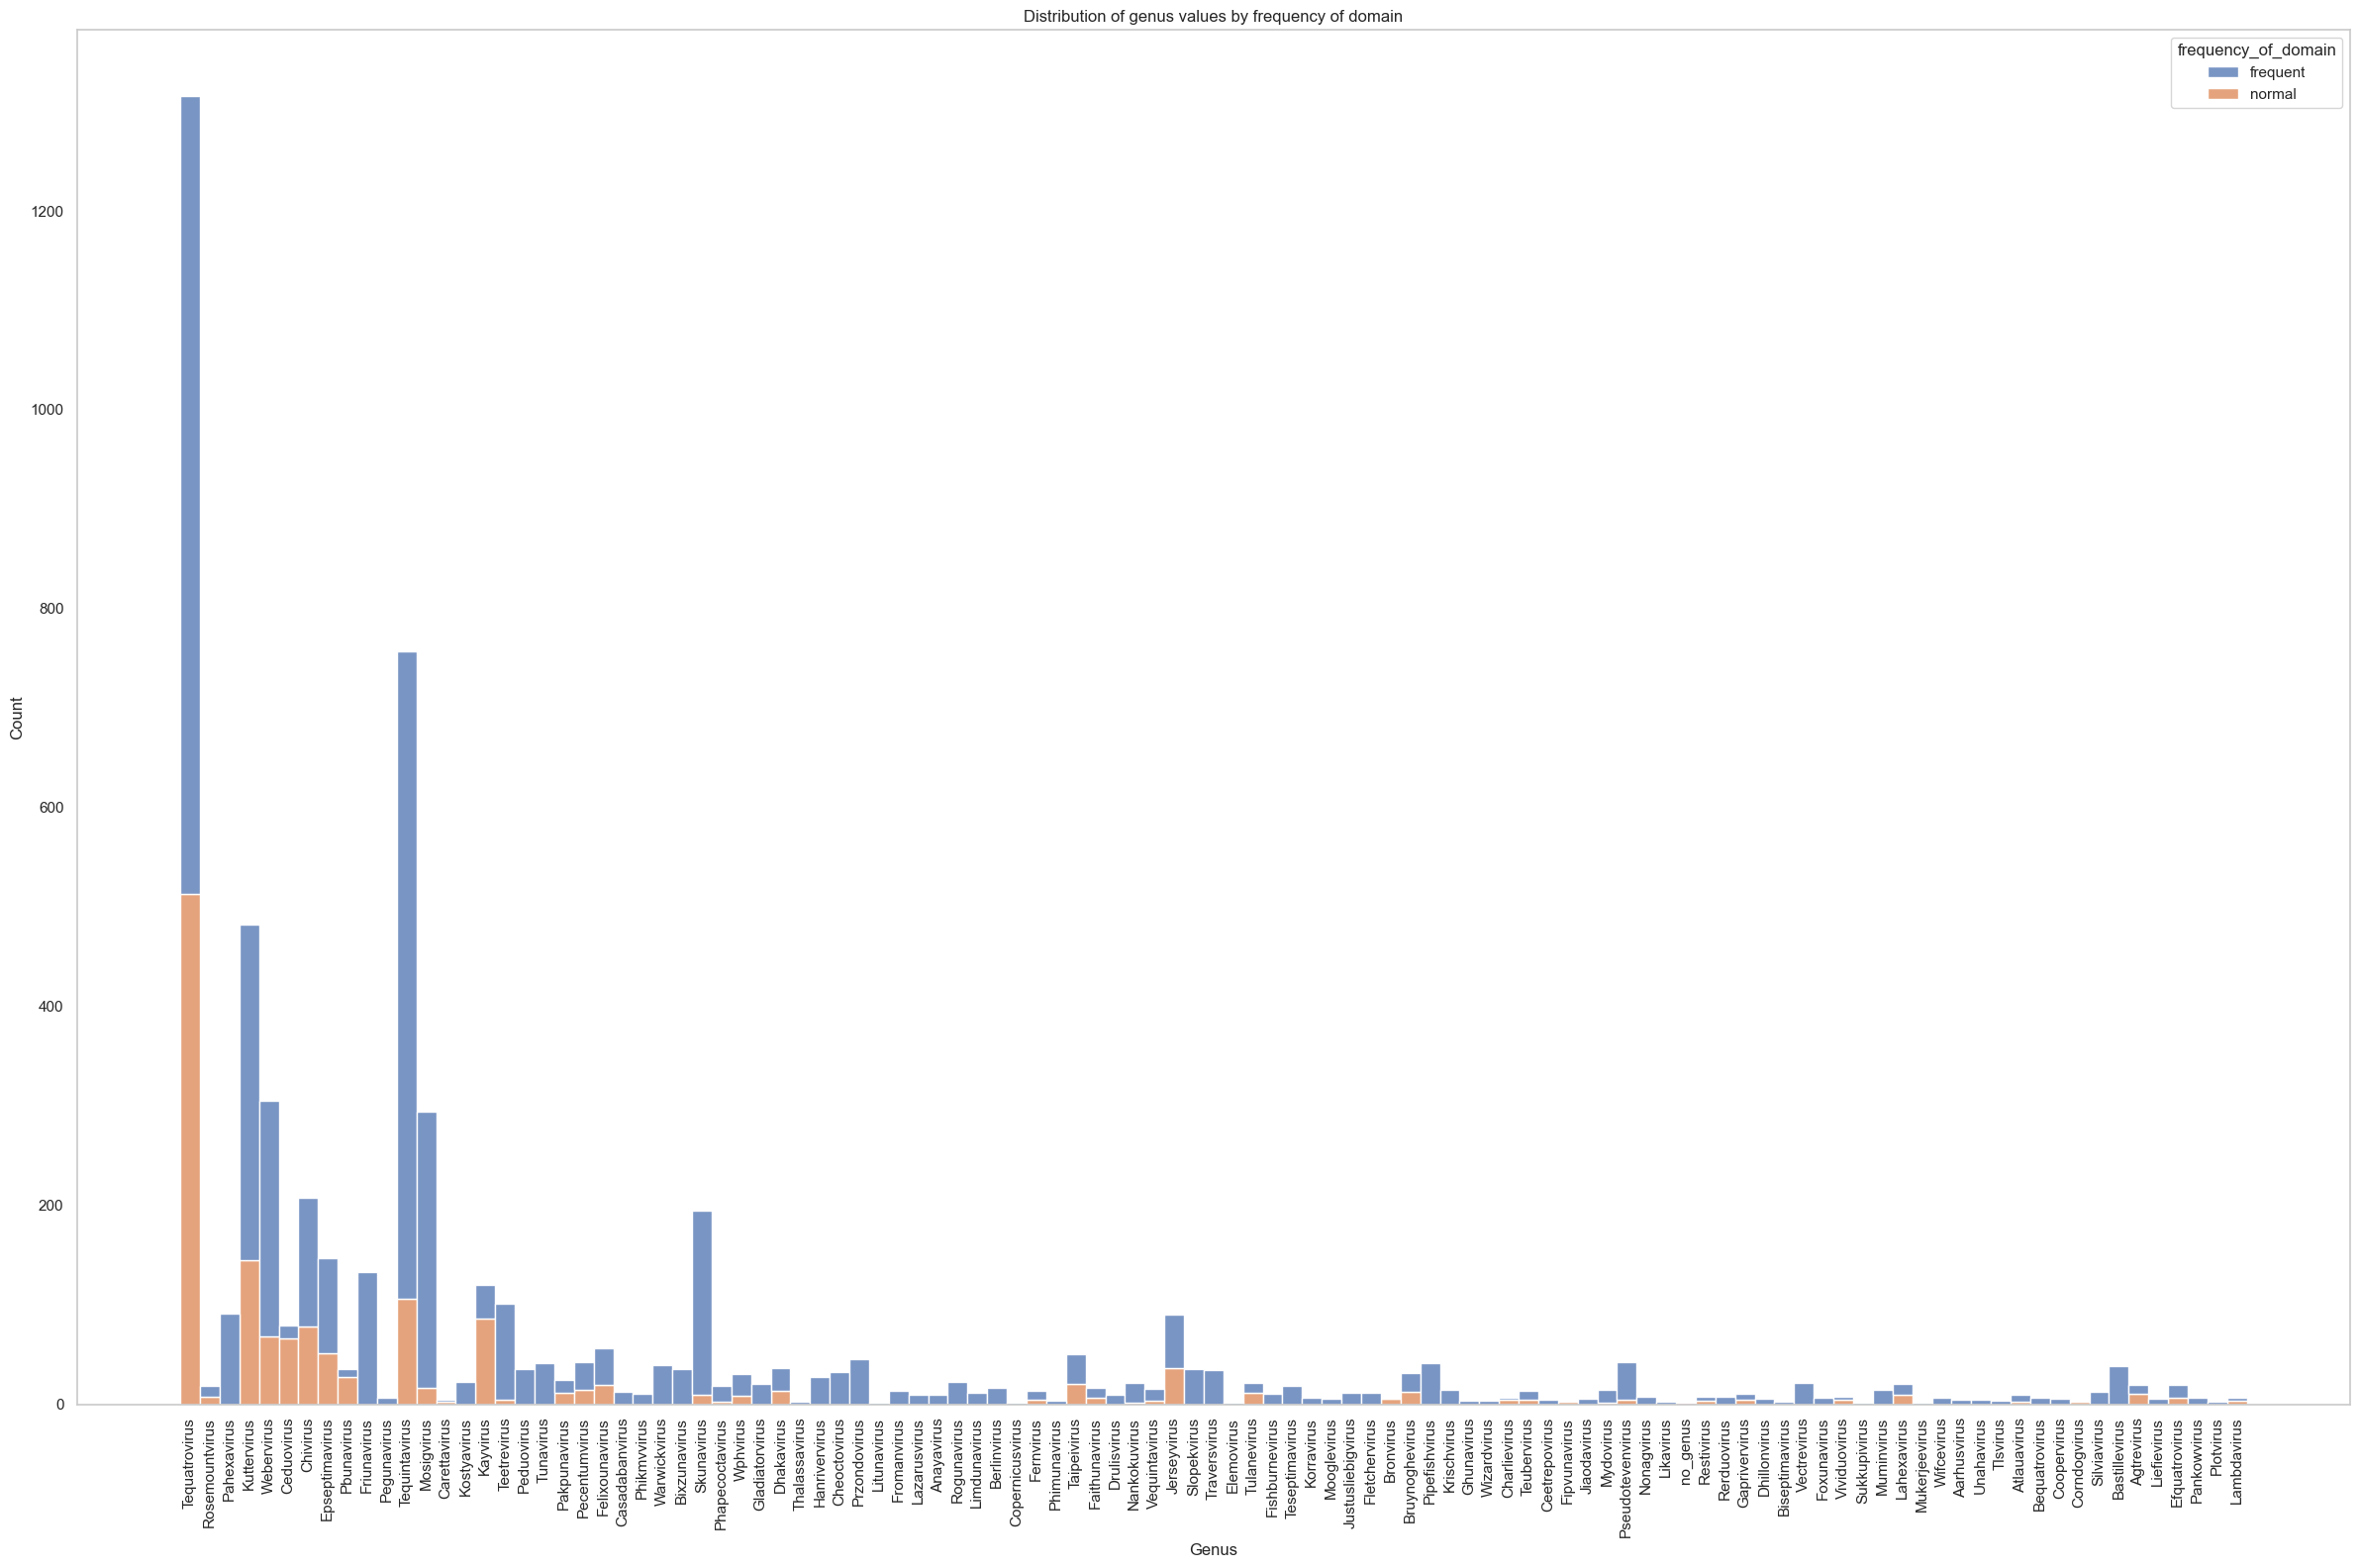

In [362]:
genus_counts = filtered_non_core_domains['genus'].value_counts().sort_values(ascending=False).index

# Ustawienie liczby binsów na liczbę unikalnych wartości w kolumnie 'genus'
num_bins = len(genus_counts)

plt.figure(figsize=(24, 16))
sns.histplot(data=filtered_non_core_domains, x='genus', hue='frequency_of_domain', multiple='stack', bins=num_bins)
plt.title('Distribution of genus values by frequency of domain')
plt.xlabel('Genus')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Obrót etykiet osi x o 90 stopni
plt.grid(False)  # Wyłączenie siatki
plt.tight_layout()
plt.show()

In [382]:
# calculation of pivot tables for both functions and function categories depending on the domain topology
pivot_annot = pd.pivot_table(filtered_non_core_domains, values='genome_id', index='t_name', columns='func_annot', aggfunc='count', fill_value=0)
pivot_category = pd.pivot_table(filtered_non_core_domains, values='genome_id', index='t_name', columns='func_category', aggfunc='count', fill_value=0)

In [474]:
# quantifying how many non-core domains have a particular protein function
column_sums = pivot_annot.sum()
sorted_column_sums = column_sums.sort_values(ascending=False)
print(sorted_column_sums)

func_annot
endonuclease                                           1023
RNA ligase                                              221
ADP-ribosyltransferase                                  163
ribonucleoside reductase                                146
major capsid                                            129
tail fiber                                              120
DNA polymerase                                          108
DNA primase                                             105
ribose-phosphate pyrophosphokinase                       99
structural protein                                       96
PAAR motif of membran proteins                           92
lipoprotein                                              85
clamp loader of DNA polymerase                           80
translation repressor                                    80
baseplate hub                                            79
Type II TA system                                        78
inhibitor of MrcBC restrictio

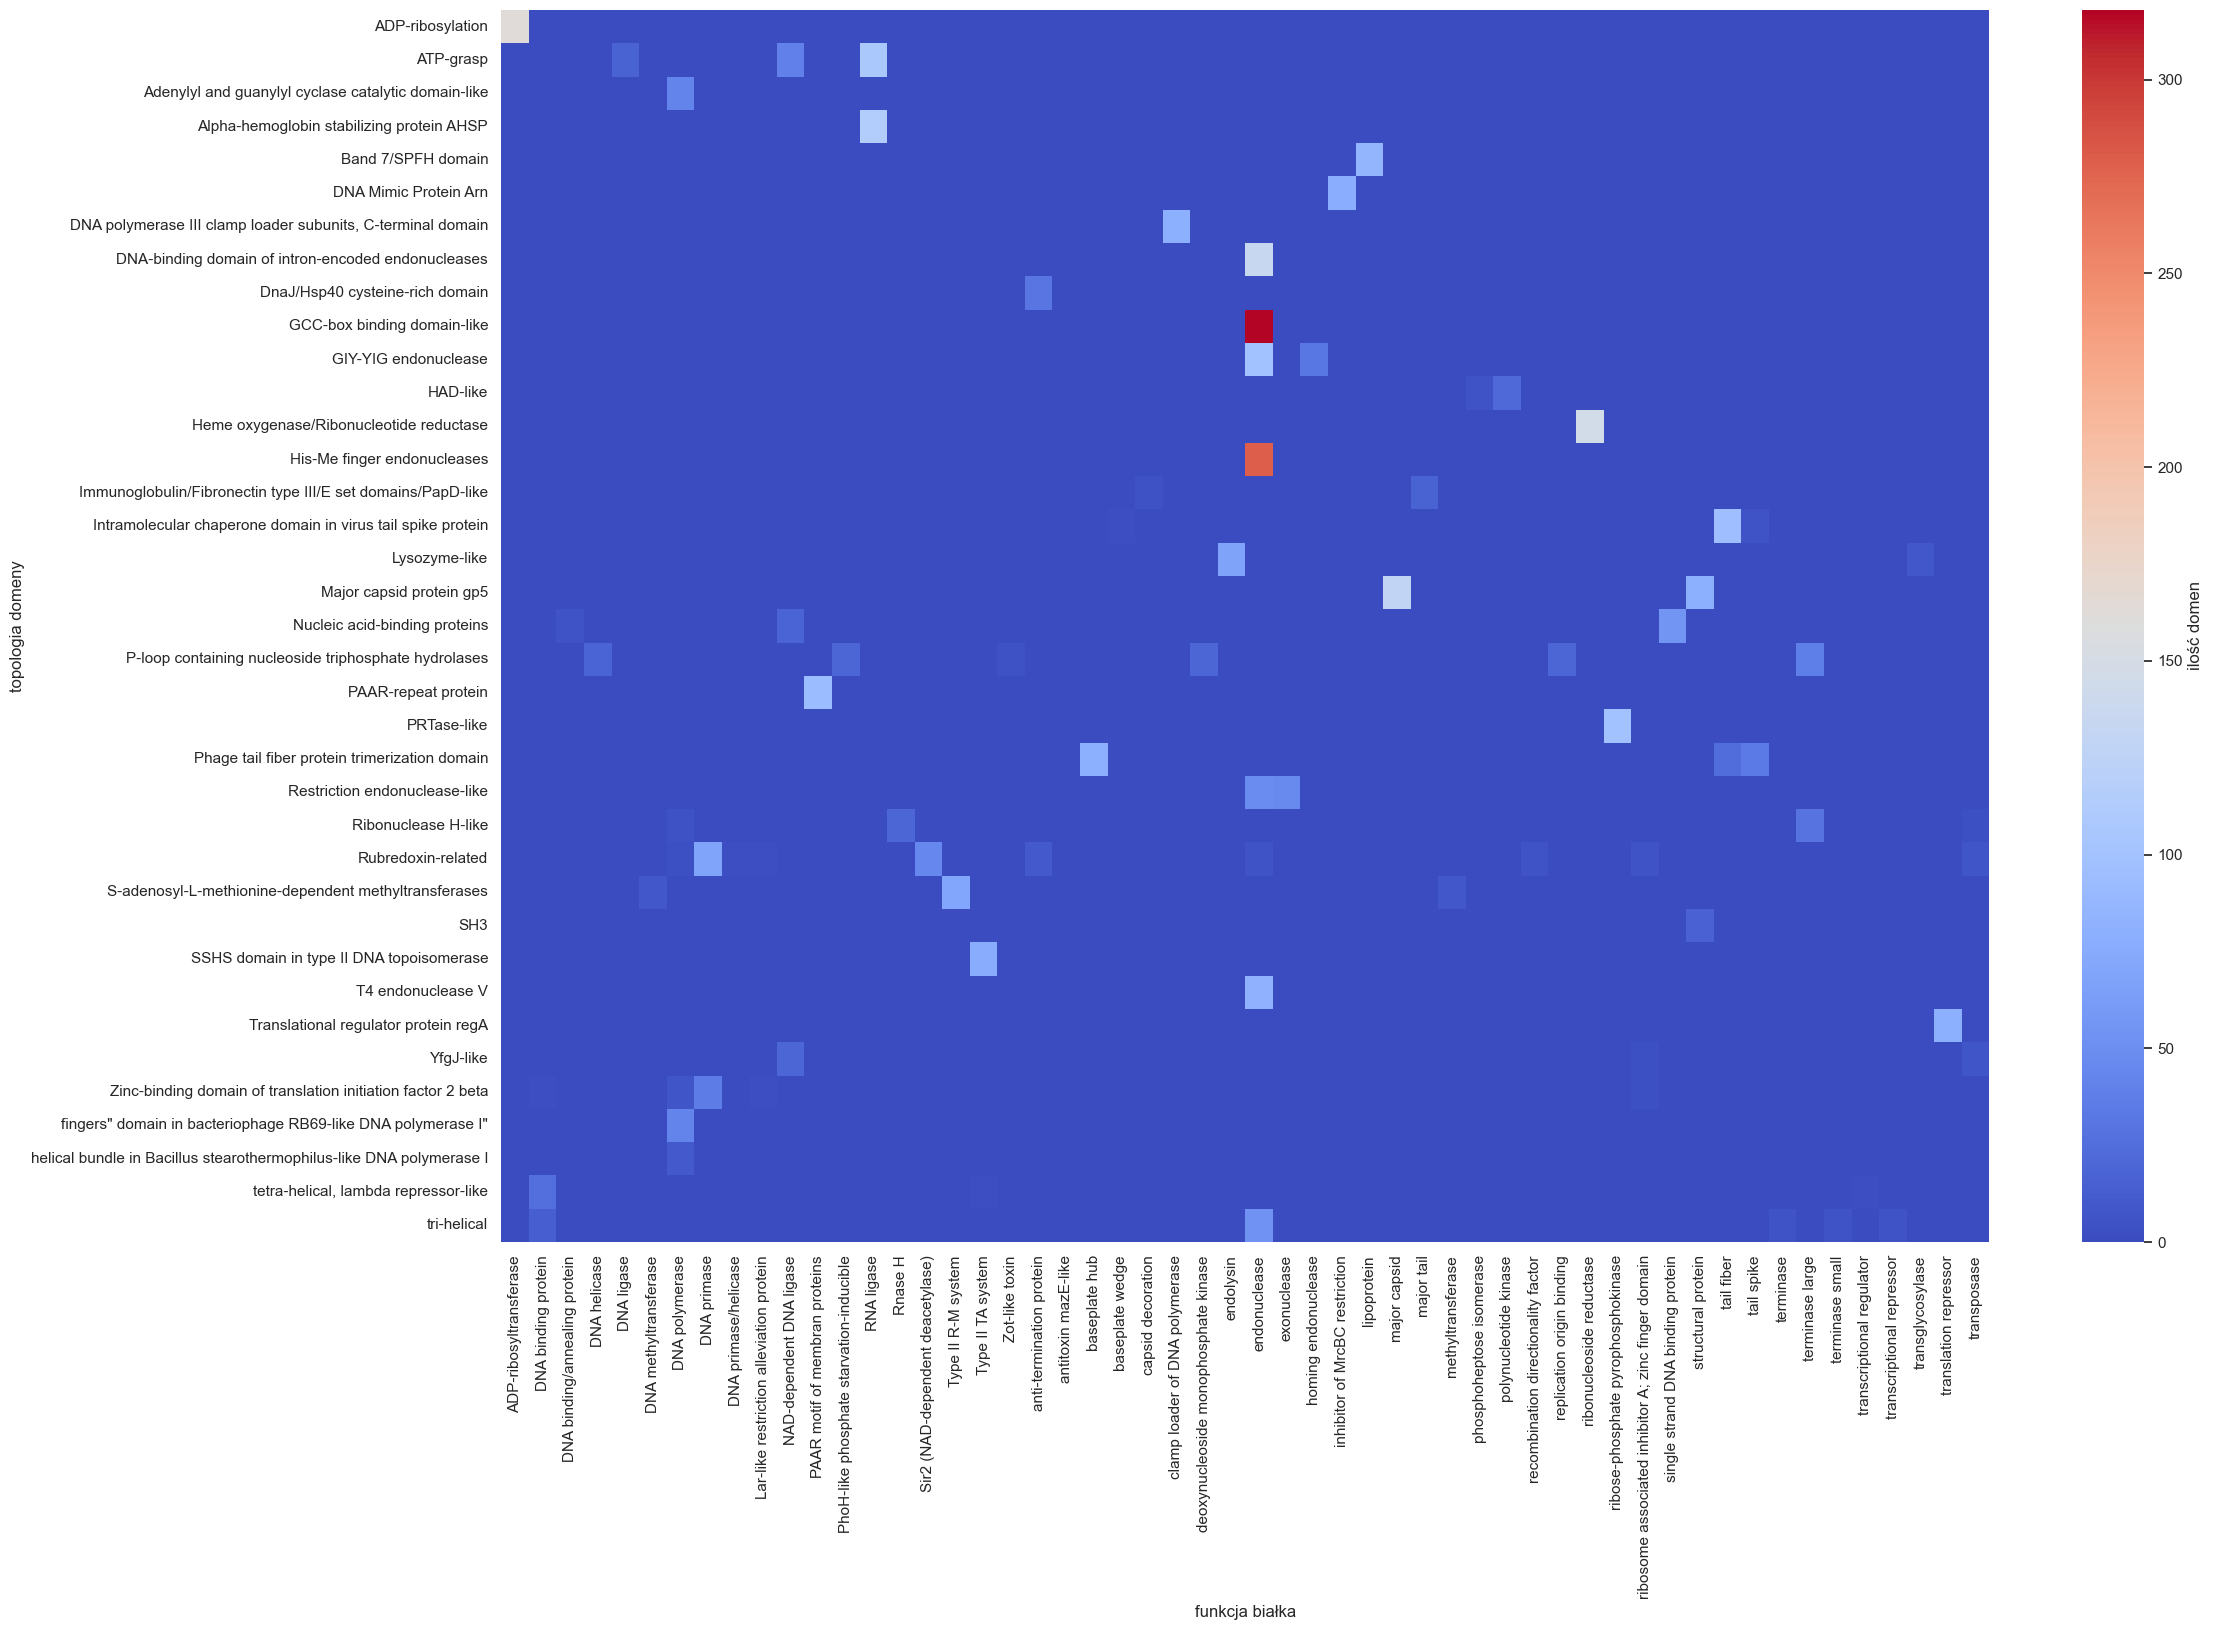

In [461]:
# heatmap showing which protein functions a given domain topology most often has
plt.figure(figsize=(24, 16))
sns.heatmap(pivot_annot, cmap='coolwarm', annot=False, fmt='d', cbar_kws={'label': 'ilość domen'})
#plt.title('Relationship between domain name and protein function')
plt.xlabel('funkcja białka')
plt.ylabel('topologia domeny')
plt.show()

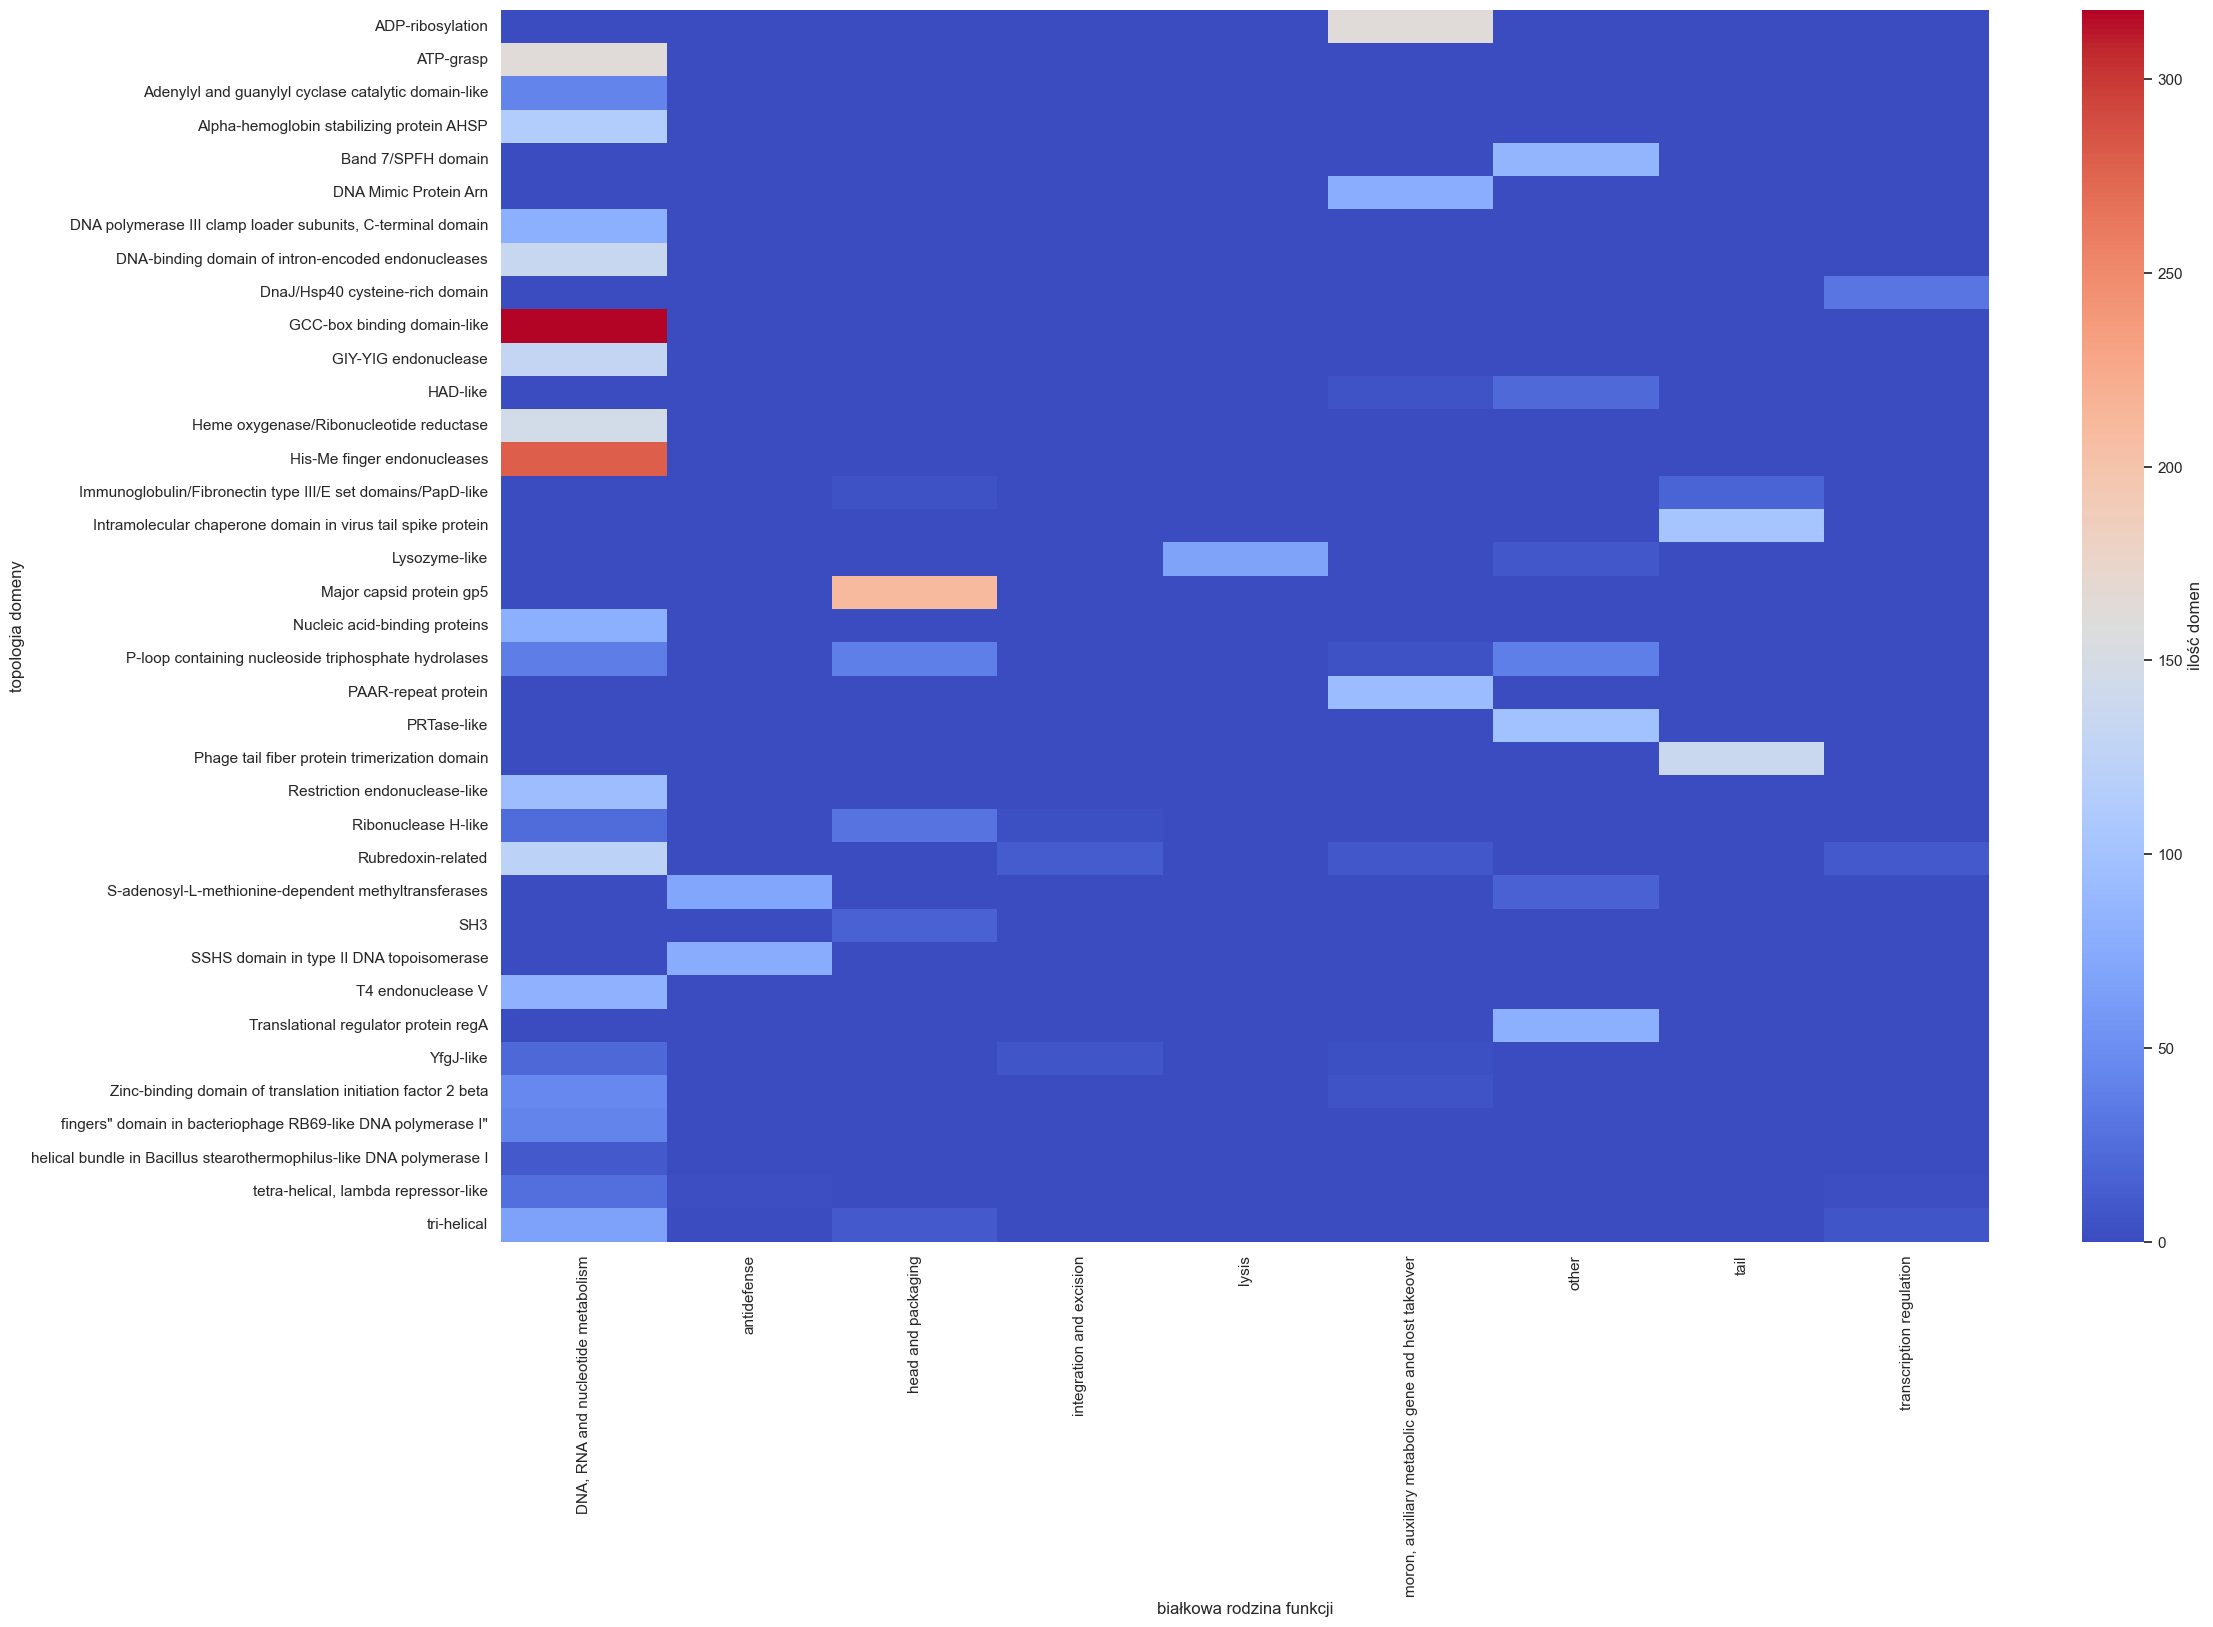

In [477]:
# heatmap showing which category of functions a given domain topology most often has
plt.figure(figsize=(24, 16))
sns.heatmap(pivot_category, cmap='coolwarm', annot=False, fmt='d', cbar_kws={'label': 'ilość domen'})
#plt.title('Relationship between domain name and protein function category')
plt.xlabel('białkowa rodzina funkcji')
plt.ylabel('topologia domeny')
plt.show()

In [478]:
# quantifying how many non-core domains have a particular category of function
column_sums_cat = pivot_category.sum()
sorted_column_sums_cat = column_sums_cat.sort_values(ascending=False)
print(sorted_column_sums_cat)

func_category
DNA, RNA and nucleotide metabolism                   2058
moron, auxiliary metabolic gene and host takeover     359
other                                                 348
head and packaging                                    307
tail                                                  257
antidefense                                           148
lysis                                                  68
transcription regulation                               51
integration and excision                               22
dtype: int64


In [479]:
# calculation of how many domains there are in the filtered set of non-core domains
total_sum_cat = sorted_column_sums_cat.sum()
total_sum_cat

3618

In [ ]:
# bar graph showing how many domains with a given frequency of occurrence there are in the data set of non-core domains

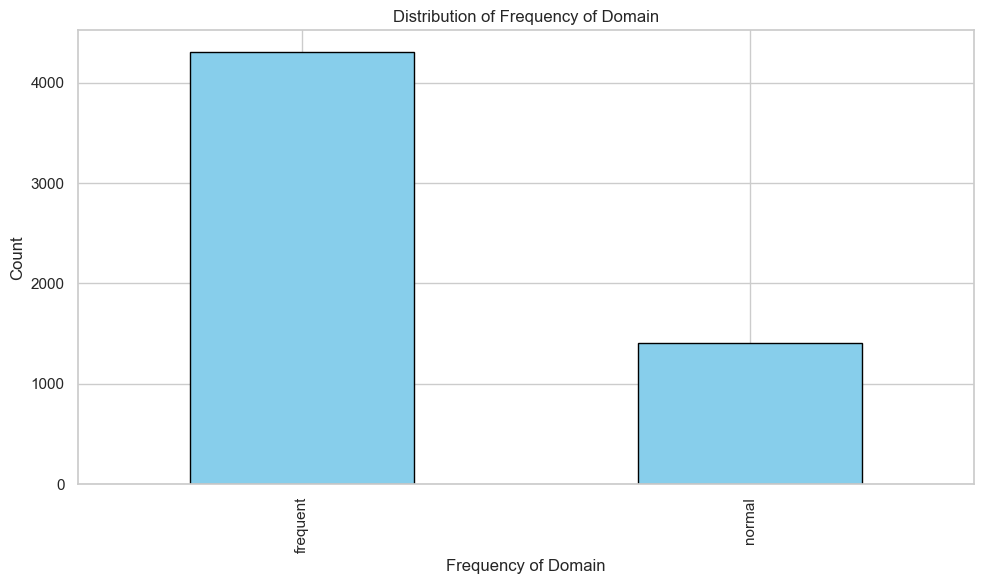

In [408]:
plt.figure(figsize=(10, 6))
filtered_non_core_domains['frequency_of_domain'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Frequency of Domain')
plt.ylabel('Count')
plt.title('Distribution of Frequency of Domain')
plt.tight_layout()
plt.show()

In [ ]:
# Calculation of the number of domains: core, non-core. Calculation of the number of domains: rare, frequent and normal.

In [464]:
counts = filtrowany_maniak_gotowy.groupby(['domain_category', 'frequency_of_domain']).size().unstack(fill_value=0)

# Addition of a row for ‘All domains’
all_domains_count = filtrowany_maniak_gotowy['frequency_of_domain'].value_counts().reindex(counts.columns, fill_value=0)
counts.loc['all'] = all_domains_count

# Calculation of the total number of domains
total_domains = sum(all_domains_count)
core_domains = counts.loc['core'].sum()
non_core_domains = counts.loc['non-core'].sum()

# Translation of the categories into Polish
categories = ['Wszystkie domeny', 'Domeny rdzeniowe', 'Domeny nie-rdzeniowe']
counts = counts.rename(index={'all': 'Wszystkie domeny', 'core': 'Domeny rdzeniowe', 'non-core': 'Domeny nie-rdzeniowe'})

# Display of results
print("Total domains:", total_domains)
print("Core domains:", core_domains)
print("Non-core domains:", non_core_domains)
print("\nCounts per category and frequency:\n", counts)

# Display of detailed quantities for each category and frequency
for category in counts.index:
    print(f"\n{category}:")
    for frequency in counts.columns:
        print(f"  {frequency}: {counts.loc[category, frequency]}")

Total domains: 77958
Core domains: 68307
Non-core domains: 9651

Counts per category and frequency:
 frequency_of_domain   frequent  normal  rare
domain_category                             
Domeny rdzeniowe         63841    3211  1255
Domeny nie-rdzeniowe      8113    1163   375
Wszystkie domeny         71954    4374  1630

Domeny rdzeniowe:
  frequent: 63841
  normal: 3211
  rare: 1255

Domeny nie-rdzeniowe:
  frequent: 8113
  normal: 1163
  rare: 375

Wszystkie domeny:
  frequent: 71954
  normal: 4374
  rare: 1630


In [ ]:
# Calculating value of correlation rank between gene length and domain length

In [412]:
correlation = filtrowany_maniak_gotowy['domain_length'].corr(filtrowany_maniak_gotowy['gene_length'])
print(f'Korelacja między domain_length a gene_length: {correlation}')

Korelacja między domain_length a gene_length: 0.7799098709222708


In [ ]:
# Comparison with each other of the lengths of the domains, and the lengths of the genes from which the domain is formed

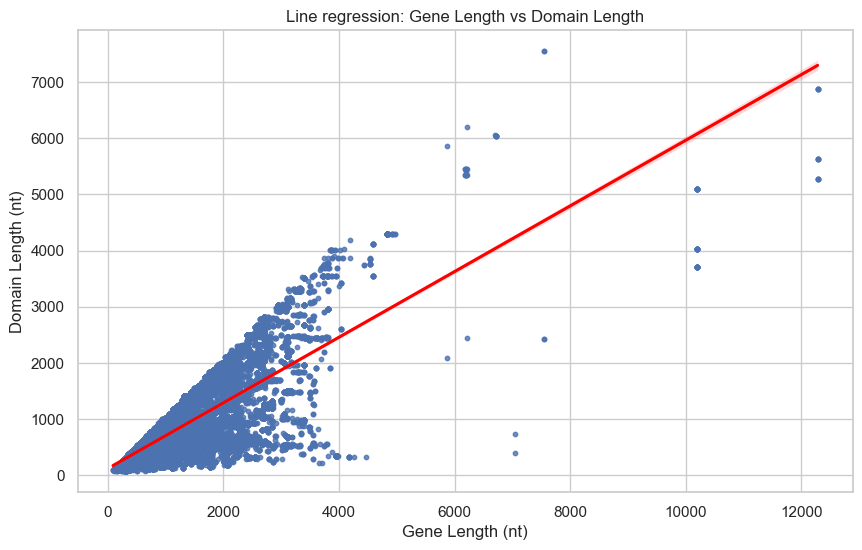

In [415]:
plt.figure(figsize=(10, 6))
sns.regplot(x='gene_length', y='domain_length', data=filtrowany_maniak_gotowy, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Gene Length (nt)')
plt.ylabel('Domain Length (nt)')
plt.title('Line regression: Gene Length vs Domain Length')
plt.show()

In [ ]:
# domain length distribution graph, only with captions in Polish - needed for Master's thesis

c:\Users\maksn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


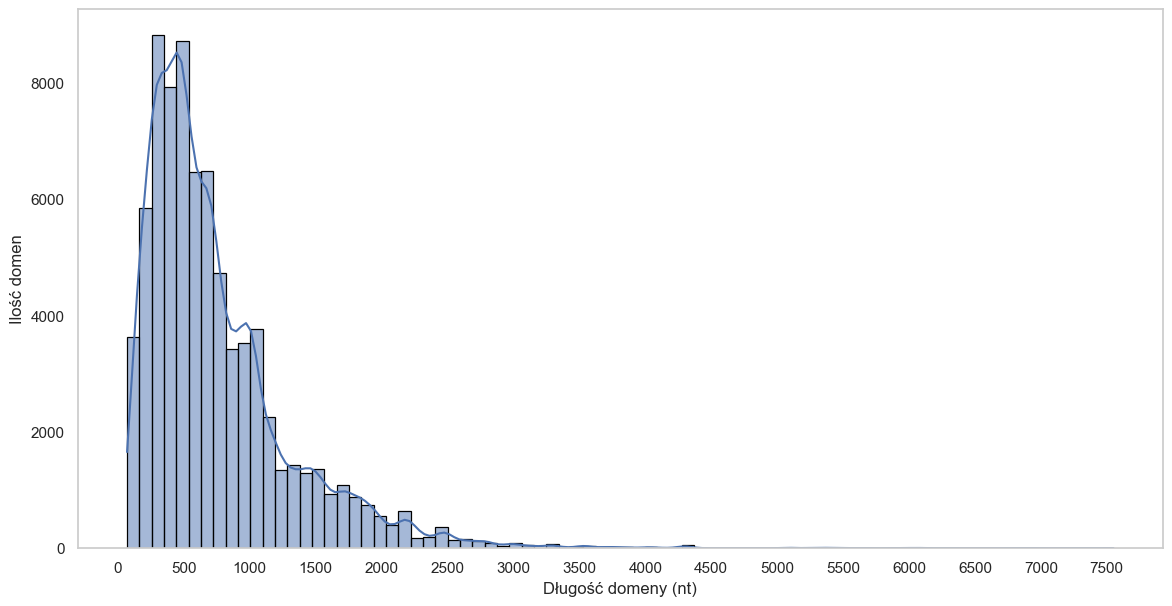

In [442]:
plt.figure(figsize=(14, 7))
sns.histplot(filtrowany_maniak_gotowy['domain_length'], bins=80, kde=True, edgecolor='black')
#plt.title('Distribution of domain lengths')
plt.xlabel('Długość domeny (nt)')
plt.ylabel('Ilość domen')
plt.xticks(ticks=range(0, filtrowany_maniak_gotowy['domain_length'].max(), 500))
plt.grid(False)
plt.show()